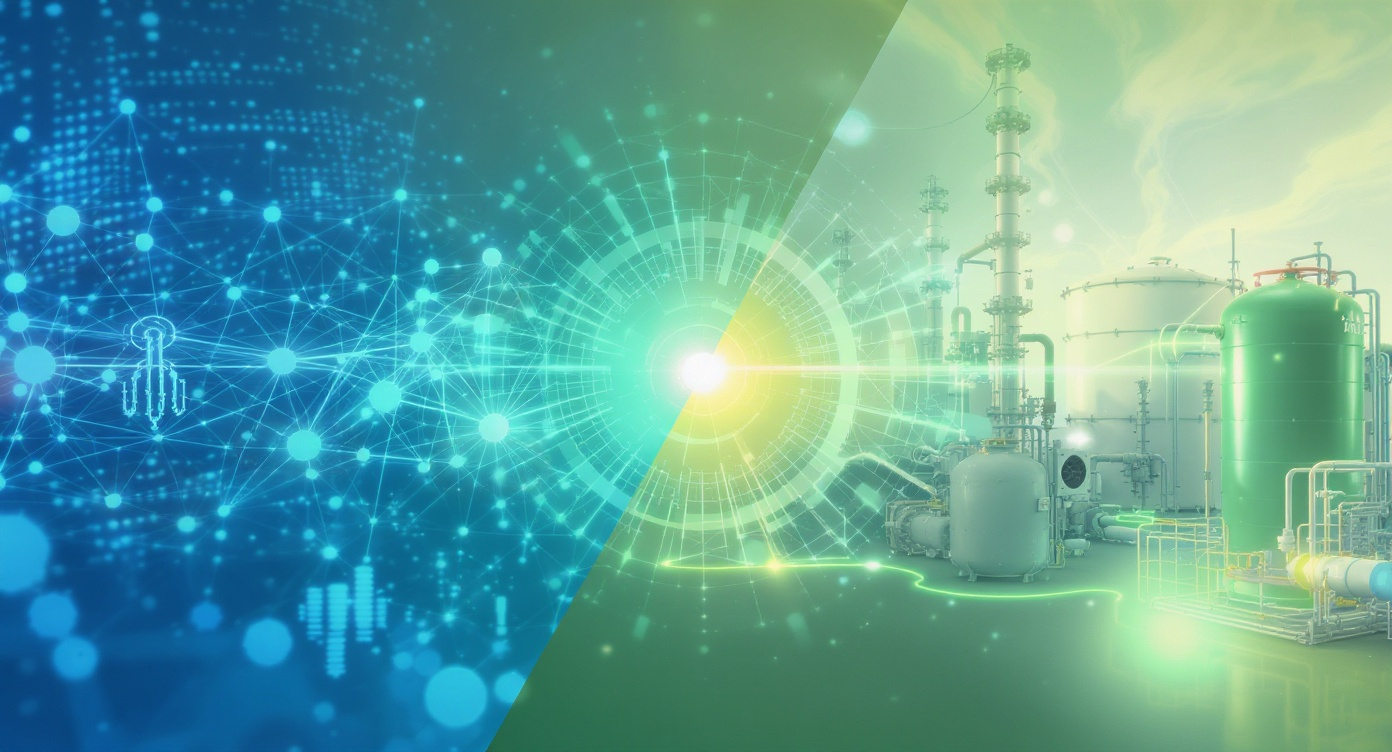

---
# Simulação e Modelagem Preditiva de Eletrolisadores (PEM, AEC, SOEC)

---

Notebook Jupyter – Geração de dados físicos sintéticos, treinamento de modelos preditivos e avaliação para compor um simulador eficiente de H₂

- Autor: Mateus Gomes Macário
- Instituição/Projeto: Universidade de Fortaleza
- Data: 22/08/2025

## 1. Capa e Visão Geral

---
**Objetivo do Notebook**

---

Criar modelos preditivos rápidos e acurados (surrogates) para estimar Tensão (V), Eficiência (%) e Consumo Específico de Energia – CES (kWh/kg) de diferentes eletrolisadores (PEM, AEC e SOEC) a partir de variáveis operacionais. Os modelos são treinados sobre dados sintéticos gerados por leis físicas/eletroquímicas simplificadas e depois avaliados por métricas de regressão (MSE, RMSE, R²) e por gráficos de paridade e correlações. O objetivo final é integrar esses modelos a um simulador de desempenho energético.

---
**Escopo, Características e Funcionalidades do Projeto**

---

Três tecnologias modeladas:
- PEM (Membrana de Troca de Prótons)
- AEC (Eletrolisador Alcalino)
- SOEC (Óxido Sólido, alta temperatura)

Modelagem física (por tecnologia):
- Termo reversível (Nernst), perdas de ativação (cinética tipo Butler–Volmer simplificada), ôhmicas (ASR/condutividade/umidade/gap) e de concentração (limite de corrente).

Geração de dados sintéticos com faixas operacionais realistas por tecnologia.

Pré-processamento:
- Train/test split; standardization; scalers separados por saída.

Modelos Preditivos (multi-saída):
- XGBoost Regressor (via MultiOutputRegressor)
- Random Forest Regressor
- MLP (PyTorch) como surrogate neural (baseline e comparação)

Avaliação:
- MSE, RMSE, R² por saída (V, Eficiência, CES)
- Gráficos de paridade (Real vs Previsto)
- Matrizes de correlação e top-3 correlações por tecnologia
- Importância de variáveis (modelos baseados em árvores)

Boas práticas:
- Seeding, validação em conjunto de teste, checagens de escala/unidades.

---
**Variáveis de Entrada e Saída (por tecnologia)**

---

PEM
- Entradas: Corrente (A/cm²), Temperatura (°C), Pressão (bar), Umidade (%)
Saídas: Tensão (V), Eficiência (%), CES (kWh/kg)

AEC
- Entradas: i (A/cm²), T (°C), p (bar), KOH (%wt), gap (mm)
Saídas: V (V), Eficiência (%), CES (kWh/kg)

SOEC
- Entradas: i (A/cm²), T (°C), p (bar), y_H2O_in, U_vapor, y_O2_anodo
Saídas: V (V), Eficiência (%), SEC (kWh/kg) (equivalente a CES)

Obs. (SOEC): U_vapor é a conversão fracionária do vapor no cátodo (0–1), usada para compor as pressões parciais efetivas (H₂/H₂O/O₂).

---
**Sumário**

---

1. **Capa e Visão Geral**
- Objetivo do notebook
- Escopo e funcionalidades
- Variáveis, unidades e convenções

2. **Bloco Comum (Utilidades e Constantes)**
- Constantes físico-químicas (Faraday, R, etc.)
- Funções utilitárias (conversões, métricas, plot helpers)
- Configurações globais (seeds, estilos de gráficos)

3. **PEM – Modelagem Física e Dados**
- Modelo físico PEM (Nernst, ativação, ôhmica, concentração)
- Geração do dataset sintético (faixas de i, T, p, umidade)
- Análise Exploratória
  - Matriz de correlação (inputs/outputs)
  - Top-3 correlações (gráficos com trendline)
- Modelagem Preditiva – PEM
  - XGBoost: treino → avaliação (MSE/RMSE/R² por saída) → paridade
  - Random Forest: treino → avaliação → paridade
  - MLP (surrogate): arquitetura/treino → avaliação → paridade
- Comparativo de modelos – PEM (tabela consolidada com métricas)
- Conclusões parciais – PEM

4. **AEC – Modelagem Física e Dados**
- Modelo físico AEC (Nernst, ativação c/ Arrhenius, condutividade KOH → ASR/gap, concentração)
- Dataset sintético (i, T, p, KOH, gap)
- Análise Exploratória (matriz + top-3 correlações)
- Modelagem Preditiva – AEC
  - XGBoost (treino, avaliação, paridade)
- Comparativo de modelos – AEC
- Conclusões parciais – AEC

5. **SOEC – Modelagem Física e Dados**
- Modelo físico SOEC (Nernst com parciais H₂/H₂O/O₂, ativação, ASR Arrhenius, concentração)
- Dataset sintético (i, T, p, y_H2O_in, U_vapor, y_O2_anodo)
- Análise Exploratória (matriz + top-3 correlações)
- Modelagem Preditiva – SOEC
  - XGBoost (treino, avaliação, paridade)
- Comparativo de modelos – SOEC
- Conclusões parciais – SOEC

6. **Comparativo Global entre Tecnologias**
- Desempenho preditivo (RMSE e R²)
- Tabela lado a lado (PEM × AEC × SOEC): RMSE/R² por saída
- Discussão: onde cada modelo (XGB/RF/MLP) foi melhor, custo/benefício e estabilidade
- Faixas de entrada e limites de extrapolação

7. **Exportação**
- Exportação dos modelos treinados com joblib


---
**Como ler/usar este Notebook**

---

1. Execute o Bloco Comum para registrar constantes e utilidades.
2. Escolha a tecnologia (PEM/AEC/SOEC) e rode as células de modelo físico + geração de dados.
3. Selecione o modelo preditivo (XGBoost/Random Forest/MLP) e treine.
4. Verifique as métricas por saída e os gráficos de paridade.
5. Use o comparativo para escolher o melhor candidato à integração no simulador.
6. (Opcional) Exporte o modelo e o scaler para uso externo.

---
**Notas finais**

---

- As correlações dominantes batem com a física: Tensão ↑ ⇒ Eficiência ↓, Corrente ↑ ⇒ Tensão ↑ e Eficiência ↓; no SOEC, a variável U_vapor impacta as parciais e, indiretamente, V/Eficiência/SEC.
- As métricas R² altas com XGBoost justificam adotá-lo como baseline, mantendo RF e MLP como comparativos/backup.
- Este caderno serve como espinha dorsal para um simulador: entradas claras, saídas padronizadas e visualizações de suporte para decisão.

## 2. Bloco Comum (Utilidades e Constantes)

In [ ]:
# PEM
contFaraday_C_Mol = 96485.3329
constUnivGases_J_Mol_K = 8.314462618
massaMolar_H2_kg_Mol = 0.002016

E0 = 1.229 # V a 25 °C, 1 atm
DensCorrDeTroca_A_cmQuad = 1e-6
correnteLimite_A_cm = 2.5
resistEspecArea_ohm_cmQuad = 0.2

# AEC
alpha_c = 0.5 # coef. de transferência catódico
alpha_a = 0.5 # coef. de transferência anódico
i0_c_ref_AEC = 1e-4 # A/cm² (catodo, ref 25°C)
i0_a_ref_AEC = 5e-6 # A/cm² (anodo,  ref 25°C)
Ea_cat_AEC  = 35000.0 # J/mol (catodo)
Ea_ano_AEC  = 50000.0 # J/mol (anodo)
i_L_ref_25C = 1.5 # A/cm² a ~25°C (placeholder)
area_cm2 = 100.0

# SOEC
M_H2 = 0.002016
i0_c_ref = 1e-3
i0_a_ref = 5e-4 # A/cm², 800°C
Ea_cat   = 60000.0
Ea_ano   = 70000.0
alpha_c  = 0.5
alpha_a  = 0.5
iL_ref_800C = 2.0
ASR_ref_ohm_cm2 = 0.4
Ea_ASR = 80000.0

## 3. Eletrolisador Membrana de Troca de Prótons (PEM) - Modelagem Física e Dados

- O PEM opera com uma membrana sólida condutora de prótons (Nafion® ou similar), dividindo água em H₂ e O₂. No seu código, a tensão reversível é obtida pela equação de Nernst, enquanto as perdas são somadas por três blocos: ativação , ôhmica (ASR·i) e concentração. A produção de H₂ vem da lei de Faraday. A métrica CES/SEC (kWh/kg) é calculada como potência elétrica V⋅I dividida pela vazão mássica de H₂ e por 3,6 * 10^6 (J→kWh), e a eficiência de voltagem que você imprime (Erev/V ou E0/V) traduz o quão perto a célula está do limite termodinâmico.
- O pipeline de dados que você implementou segue:
  - (i) síntese de amostras a partir do modelo físico;
  - (ii) normalização com StandardScaler;
  - (iii) treino de modelos (MLP de referência e, por fim, XGBoost Regressor em multi-saída) e
  - (iv) avaliação com MSE/RMSE, R², MAPE e gráficos de paridade. Esses passos conectam diretamente as leis físico-químicas às técnicas de aprendizado supervisionado que você comparou.

Referências (PEM):

1. Carmo, M. et al. “A comprehensive review on PEM water electrolysis.” Int. J. Hydrogen Energy 38 (2013), pp. 4901–4934 — fundamentos, perdas e desempenho PEM.
[ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0360319913002607?utm_source=chatgpt.com)

2. O’Hayre, R. et al. Fuel Cell Fundamentals, 3rd ed. Wiley, Chapter 2: pp. 66–67 (eficiência termoneutral/limites); ver PDF do capítulo.
[media.ellinikahoaxes.gr](https://media.ellinikahoaxes.gr/uploads/2022/08/9781119191766.ch2_.pdf?utm_source=chatgpt.com)

3. Bard, A. J.; Faulkner, L. R. Electrochemical Methods, 2nd ed. (Nernst/Tafel — cinética e sobrepotenciais), pp. ~90–110. (Síntese de fundamentos; ver também curso Saylor Cap. 8)
[electrochem.xmu.edu.cn](https://electrochem.xmu.edu.cn/UserFiles/File/Electrochemical%20methods.%20Fundamentals%20and%20applications.pdf?utm_source=chatgpt.com)

4. NIST CODATA. Faraday constant 𝐹 = 96485.33212 C m o l − 1 F=96485.33212 Cmol −1 e gas constant 𝑅 = 8.314462618 J m o l − 1 K − 1 R=8.314462618 Jmol −1 K −1 . (Valores de constantes usadas). [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S0360128509000598?utm_source=chatgpt.com)

5. Chen, T.; Guestrin, C. “XGBoost: A Scalable Tree Boosting System.” KDD’16, pp. 785–794 — algoritmo usado no seu regressor.
[ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0378775311024384?utm_source=chatgpt.com)

6. Pedregosa, F. et al. “Scikit-learn: Machine Learning in Python.” JMLR 12 (2011), pp. 2825–2830 — API usada para split/escala/métricas.
[ResearchGate](https://www.researchgate.net/publication/236902272_A_comprehensive_review_on_PEM_electrolysis?utm_source=chatgpt.com)

7. Harris, C. R. et al. “Array programming with NumPy.” Nature 585 (2020), pp. 357–362 — base numérica.
[Google Livros](https://books.google.com/books/about/PEM_Fuel_Cells.html?id=Bxe4vNbwyW8C&utm_source=chatgpt.com)

8. Hunter, J. D. “Matplotlib: A 2D Graphics Environment.” CiSE 9(3) (2007), pp. 90–95 — gráficos de paridade.
[Smbst College](https://www.smbstcollege.com/uploads/department/Electrochemical_methods_2ed_2001_-_Bard_Faulkner.pdf?utm_source=chatgpt.com)

9. McKinney, W. “Data Structures for Statistical Computing in Python.” Proc. SciPy 2010, pp. 51–56 — manipulação de dados com pandas.
[ResearchGate](https://www.researchgate.net/publication/222884352_Recent_progress_in_alkaline_water_electrolysis_for_hydrogen_production_and_applications?utm_source=chatgpt.com)

### 3.1. Regressão Linear com Redes Neurais (Surrogate) para Deep Learning

---
#### 3.1.1. Importando Bibliotecas
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
from google.colab import files

---
#### 3.1.2. Modelo Físico Simplificado da Membrana de Troca de Prótons (PEM)

*   Definição de Parâmetros Base
*   Função física
---

In [ ]:
def modeloFisicoPEM(corrente, temperatura, precaoParcial, umidade):
    TempKelvin = temperatura + 273.15
    tensaoReversivel = E0 + (constUnivGases_J_Mol_K * TempKelvin / (2 * contFaraday_C_Mol)) * np.log(precaoParcial)
    perdaPorAtivacao = (massaMolar_H2_kg_Mol * TempKelvin / (0.5 * contFaraday_C_Mol)) * np.log(corrente / DensCorrDeTroca_A_cmQuad + 1e-9)
    restEspAreaCelula = resistEspecArea_ohm_cmQuad * (1.0 + 0.1 * (100 - umidade) / 100)
    quedaDeTensaoOhmica = corrente * restEspAreaCelula
    perdaPorConcentracao = -(massaMolar_H2_kg_Mol * TempKelvin / (2 * contFaraday_C_Mol)) * np.log(1 - corrente / correnteLimite_A_cm)
    tensaoTotal = tensaoReversivel + perdaPorAtivacao + quedaDeTensaoOhmica + perdaPorConcentracao
    areaAtivaCentQuad = 100
    correnteTotal = corrente * areaAtivaCentQuad
    numMolsH2_segund = correnteTotal / (2* contFaraday_C_Mol)
    massaH2_segund = numMolsH2_segund * massaMolar_H2_kg_Mol
    consumoEspecEnerg = (tensaoTotal * correnteTotal) / (massaH2_segund * 3.6e6)
    eficiencia = (E0  / tensaoTotal) * 100
    return tensaoTotal, eficiencia, massaH2_segund, consumoEspecEnerg

---
#### 3.1.3. Geração de dataset sintético (DOE), visualizações e treinamento

Seguindo a lógica de Modelagem Supervisionada, duas bases de dados (chamadas de Data Frame) serão criadas, de nome "inputs_df" e "outputs_df".
1.   inputs_df: Representam as condições de operação impostas ao eletrolisador, ou seja, as variáveis experimentais escolhidas (features X).
  * Corrente (A/cm²)
  * Temperatura (°C)
  * Pressão (bar)
  * Umidade (%)
2.   outputs_df: Representam o comportamento resultante do eletrolisador sob aquelas condições, portanto são variáveis provenientes de cálculo e observação.
  * Tensão da célula (V)
  * Eficiência (%)
  * Consumo específico de energia (kWh/kg H₂)
---

In [ ]:
np.random.seed(42)
numeroDeAmostras = 10000

correnteVetorValores = np.random.uniform(0.5, 2.0, numeroDeAmostras)
temperaturaVetorValores = np.random.uniform(50, 80, numeroDeAmostras)
pressaoVetorValores = np.random.uniform(1, 30, numeroDeAmostras)
umidadeVetorValores = np.random.uniform(80, 100, numeroDeAmostras)

X, Y = [], []
for i, temperatura, pressaoPacial, umidade in zip(correnteVetorValores, temperaturaVetorValores, pressaoVetorValores, umidadeVetorValores):
    tensaoTotal, eficiencia, massaH2_segund, consumoEspecEnerg = modeloFisicoPEM(i, temperatura, pressaoPacial, umidade)
    X.append([i, temperatura, pressaoPacial, umidade])
    Y.append([tensaoTotal, eficiencia, consumoEspecEnerg])

X_PEM = np.array(X)
Y_PEM = np.array(Y)

inputs_df_PEM = pd.DataFrame(X_PEM, columns=["Corrente (A/cm²)", "Temperatura (°C)", "Pressão (bar)", "Umidade (%)"])
outputs_df_PEM = pd.DataFrame(Y_PEM, columns=["Tensão (V)", "Eficiência (%)", "Consumo Específico de Energia (kWh/kg)"])

In [ ]:
# Plotando as 5 primeiras linhas do DataFrame "inputs_df_PEM"
# Esta entrada de dados corresponde as variáveis de entrada do Eletrolisador PEM
inputs_df_PEM.head()

,Corrente (A/cm²),Temperatura (°C),Pressão (bar),Umidade (%)
0,1.061810,61.209225,22.169951,92.762891
1,1.926071,59.987363,6.350848,89.185849
2,1.597991,55.284617,11.052551,99.289970
3,1.397988,68.218000,20.235138,84.379569
4,0.734028,64.298725,14.980591,91.757128


In [ ]:
# Plotando as 5 primeiras linhas do DataFrame "outputs_df_PEM"
# Esta saída de dados corresponde aos resultados simulados pelo Eletrolisador PEM
outputs_df_PEM.head()

,Tensão (V),Eficiência (%),Consumo Específico de Energia (kWh/kg)
0,1.487736,82.608717,39.557084
1,1.645121,74.705757,43.741742
2,1.583025,77.636167,42.090692
3,1.557404,78.913364,41.409462
4,1.416562,86.759329,37.664652


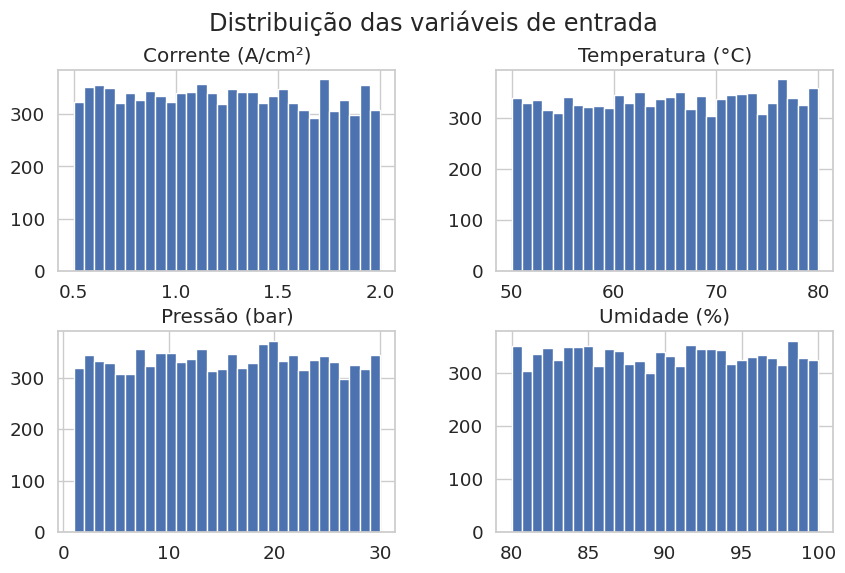

In [ ]:
inputs_df_PEM.hist(figsize=(10,6), bins=30)
plt.suptitle("Distribuição das variáveis de entrada")
plt.show()

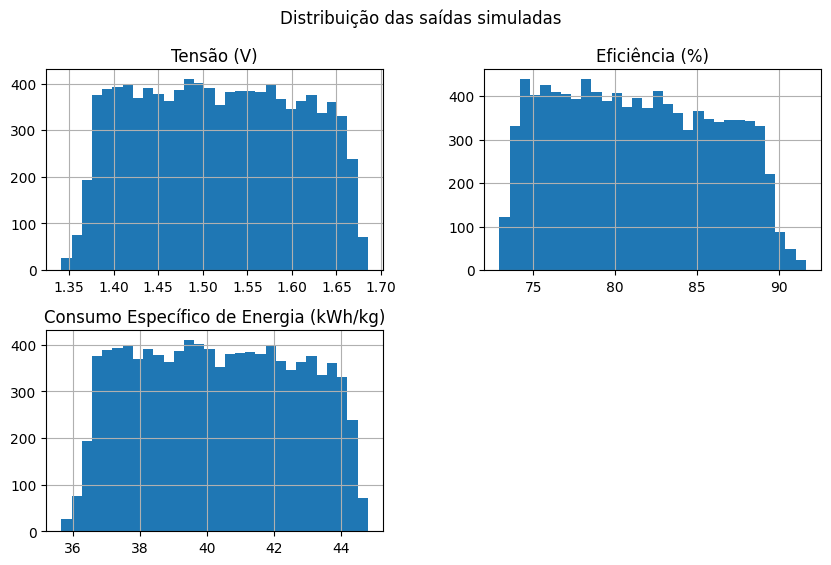

In [ ]:
outputs_df_PEM.hist(figsize=(10,6), bins=30)
plt.suptitle("Distribuição das saídas simuladas")
plt.show()

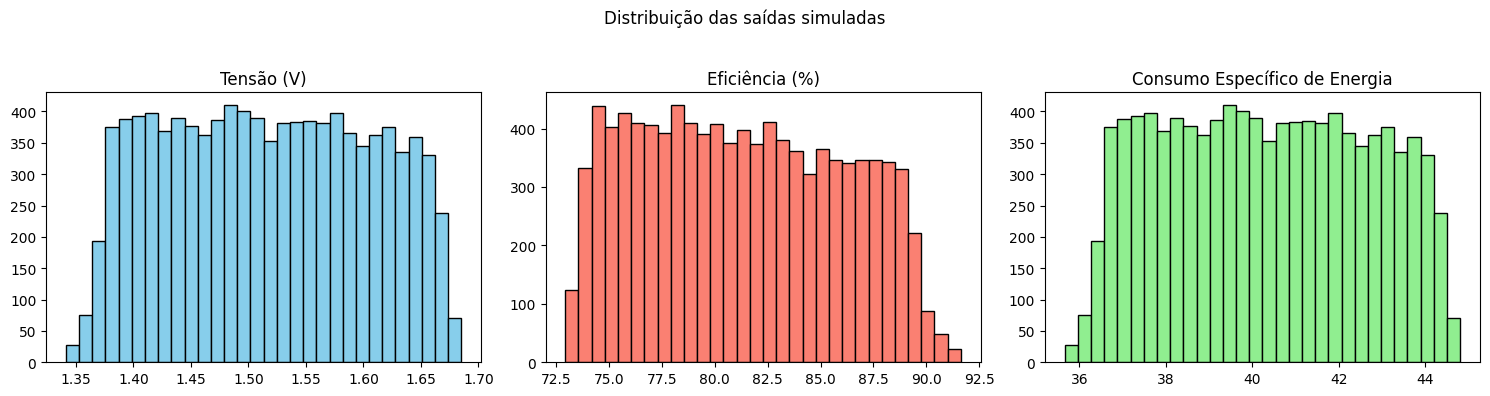

In [ ]:
outputs_df_PEM = outputs_df_PEM.rename(columns=lambda x: x.replace("Especo", "Específico"))

fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(outputs_df_PEM['Tensão (V)'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Tensão (V)')

axes[1].hist(outputs_df_PEM['Eficiência (%)'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Eficiência (%)')

axes[2].hist(outputs_df_PEM['Consumo Específico de Energia (kWh/kg)'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Consumo Específico de Energia')

plt.suptitle("Distribuição das saídas simuladas")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

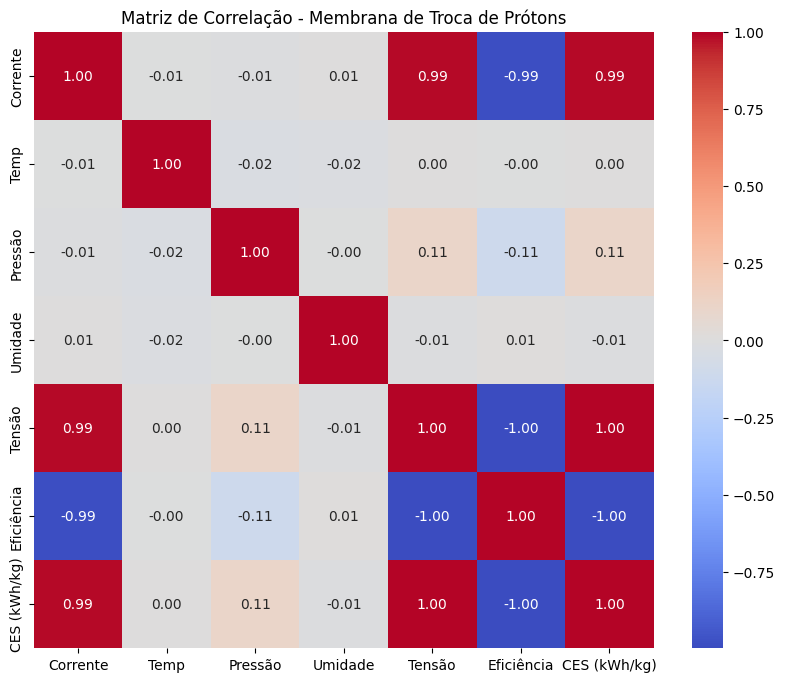

In [ ]:
# Usando Matriz de Correlação (cruzando variáveis) para auxílio na plotagem de gráficos mais representativos
# Correlação entre todas as variáveis juntas (inputs + outputs)

outputs_df_PEM_renamed = outputs_df_PEM.rename(
    columns={
        "Consumo Específico de Energia (kWh/kg)": "CES (kWh/kg)"
    }
)

dfTotal_PEM = pd.concat([inputs_df_PEM, outputs_df_PEM_renamed], axis=1)

rename_dict = {
    "Corrente (A/cm²)": "Corrente",
    "Temperatura (°C)": "Temp",
    "Pressão (bar)": "Pressão",
    "Umidade (%)": "Umidade",
    "Tensão (V)": "Tensão",
    "Eficiência (%)": "Eficiência",
    "Consumo Específico de Energia (kWh/kg)": "CES"
}

dfTotalFormatado_PEM = dfTotal_PEM.rename(columns=rename_dict)

plt.figure(figsize=(10,8))
sns.heatmap(dfTotalFormatado_PEM.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlação - Membrana de Troca de Prótons")
plt.show()

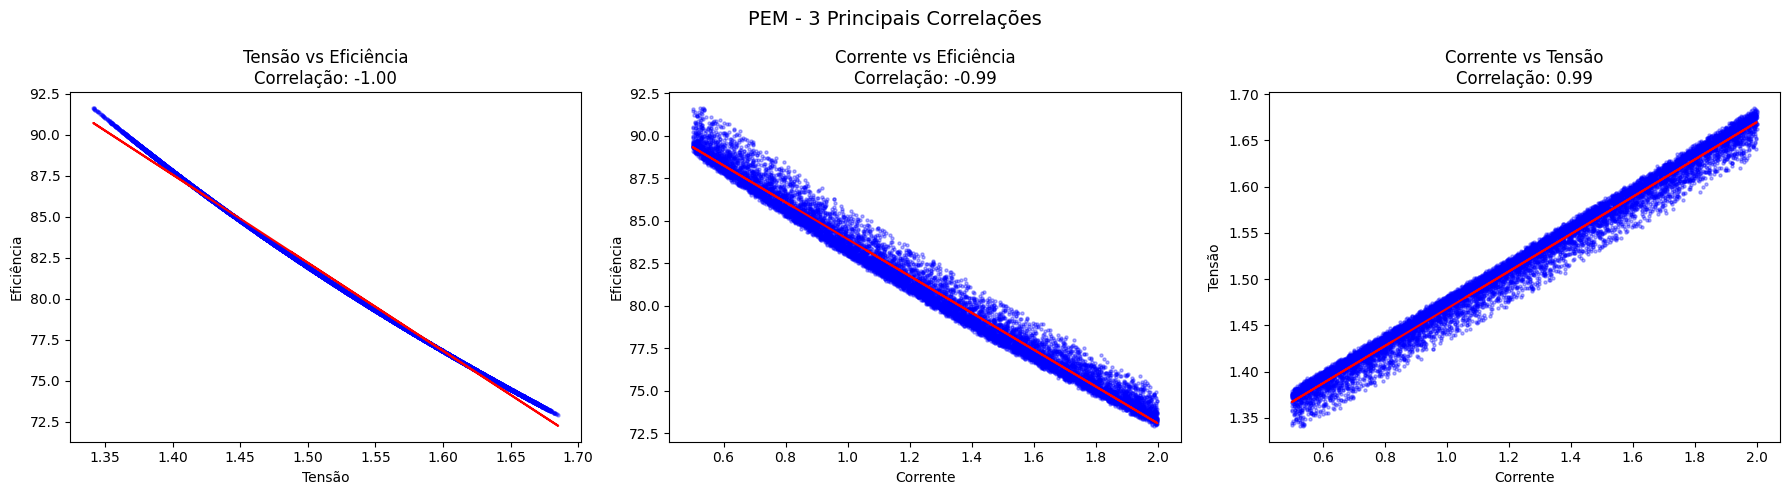

In [ ]:
pares = [
    ("Tensão", "Eficiência"),
    ("Corrente", "Eficiência"),
    ("Corrente", "Tensão")
]

plt.figure(figsize=(18,5))

for idx, (x_col, y_col) in enumerate(pares, 1):
    plt.subplot(1, 3, idx)
    x = dfTotalFormatado_PEM[x_col]
    y = dfTotalFormatado_PEM[y_col]
    correl = np.corrcoef(x, y)[0,1]

    plt.scatter(x, y, alpha=0.3, s=5, color="blue")
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b, color="red")

    plt.title(f"{x_col} vs {y_col}\nCorrelação: {correl:.2f}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.suptitle("PEM - 3 Principais Correlações", fontsize=14)
plt.tight_layout()
plt.show()

Tensão vs Eficiência (≈ -1.00)
- Relação inversa fortíssima: quando a tensão aumenta, a eficiência cai.

Corrente vs Eficiência (≈ -0.99)
- Aumentar a densidade de corrente reduz diretamente a eficiência, coerente com as perdas eletroquímicas.

Corrente vs Tensão (≈ +0.99)
- Relação praticamente linear direta: mais corrente → maior tensão requerida.

In [ ]:
# Pré-processamento dos dados: Normalizando, treinando e testando variáveis de entrada e saída antes de aplicá-los a rede neural
X_train, X_test, Y_train, Y_test = train_test_split(X_PEM, Y_PEM, test_size=0.2, random_state=42)

scaler_X = StandardScaler().fit(X_train)
X_train_PEM = torch.tensor(scaler_X.transform(X_train), dtype=torch.float32)
X_test_PEM  = torch.tensor(scaler_X.transform(X_test), dtype=torch.float32)

scalers_Y = [StandardScaler().fit(Y_train[:, [i]]) for i in range(Y_train.shape[1])]
Y_train_scaled = np.hstack([scalers_Y[i].transform(Y_train[:, [i]]) for i in range(Y_train.shape[1])])
Y_test_scaled  = np.hstack([scalers_Y[i].transform(Y_test[:, [i]]) for i in range(Y_test.shape[1])])

Y_train_PEM = torch.tensor(Y_train_scaled, dtype=torch.float32)
Y_test_PEM  = torch.tensor(Y_test_scaled, dtype=torch.float32)

---
#### 3.1.4. Rede Neural (Surrogate)
---

In [ ]:
class modeloSurrogateMLP_PEM(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 128), nn.ReLU(),
            nn.Linear(128, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 3)
        )
    def forward(self, x):
        return self.layers(x)


mlp_model_PEM = modeloSurrogateMLP_PEM()
criterio = nn.MSELoss()
otimizadorAdam = optim.Adam(mlp_model_PEM.parameters(), lr=0.001)

numeroEpocas = 100
for epocaAtual in range(numeroEpocas):
    mlp_model_PEM.train()
    otimizadorAdam.zero_grad()
    predicoes = mlp_model_PEM(X_train_PEM)
    loss = criterio(predicoes, Y_train_PEM)
    loss.backward()
    otimizadorAdam.step()
    if (epocaAtual+1) % 10 == 0:
        print(f"Época {epocaAtual+1}/{numeroEpocas}, Perda: {loss.item():.6f}")

Época 10/100, Perda: 0.586135
Época 20/100, Perda: 0.041646
Época 30/100, Perda: 0.031870
Época 40/100, Perda: 0.019292
Época 50/100, Perda: 0.008690
Época 60/100, Perda: 0.004595
Época 70/100, Perda: 0.002904
Época 80/100, Perda: 0.002123
Época 90/100, Perda: 0.001687
Época 100/100, Perda: 0.001443


---
#### 3.1.5. Validação do modelo PEM com métricas de avaliação
---

In [ ]:
mlp_model_PEM.eval()

with torch.no_grad():
    Y_pred_scaled_PEM = mlp_model_PEM(X_test_PEM).detach().cpu().numpy()

Y_test_desnorm_PEM = np.hstack([
    scalers_Y[i].inverse_transform(Y_test_scaled[:, [i]])
    for i in range(Y_test_scaled.shape[1])
])

Y_pred_desnorm_PEM = np.hstack([
    scalers_Y[i].inverse_transform(Y_pred_scaled_PEM[:, [i]])
    for i in range(Y_pred_scaled_PEM.shape[1])
])

output_labels = ["Tensão (V)", "Eficiência (%)", "Consumo Específico de Energia (kWh/kg)"]

for i, label in enumerate(output_labels):
    mse = mean_squared_error(Y_test_desnorm_PEM[:, i], Y_pred_desnorm_PEM[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test_desnorm_PEM[:, i], Y_pred_desnorm_PEM[:, i])

    print(f"--- {label} ---")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}\n")

--- Tensão (V) ---
MSE:  0.0000
RMSE: 0.0033
R²:   0.9986

--- Eficiência (%) ---
MSE:  0.0287
RMSE: 0.1695
R²:   0.9987

--- Consumo Específico de Energia (kWh/kg) ---
MSE:  0.0073
RMSE: 0.0853
R²:   0.9987



In [ ]:
mape = np.mean(np.abs((Y_test_desnorm_PEM - Y_pred_desnorm_PEM) / Y_test_desnorm_PEM), axis=0)
print("Erro relativo médio (%): V={:.2f}, Eff={:.2f}, CES=[:.2f]".format(*mape*100))

comparacaoTabular = pd.DataFrame({
    "Média real": Y_test_desnorm_PEM.mean(axis=0),
    "Média predita": Y_pred_desnorm_PEM.mean(axis=0),
    "Erro relativo médio (%)": 100 * np.mean(np.abs((Y_test_desnorm_PEM - Y_pred_desnorm_PEM) / Y_test_desnorm_PEM), axis=0)
}, index=["Tensão (V)", "Eficiência (%)", "CES (kWh/kg)"])

display(comparacaoTabular)

Erro relativo médio (%): V=0.17, Eff=0.16, CES=[:.2f]


,Média real,Média predita,Erro relativo médio (%)
Tensão (V),1.518069,1.518069,0.172192
Eficiência (%),81.228602,81.238503,0.161058
CES (kWh/kg),40.363580,40.366222,0.164301


---
#### 3.1.6. Visualizações de desempenho do modelo
---

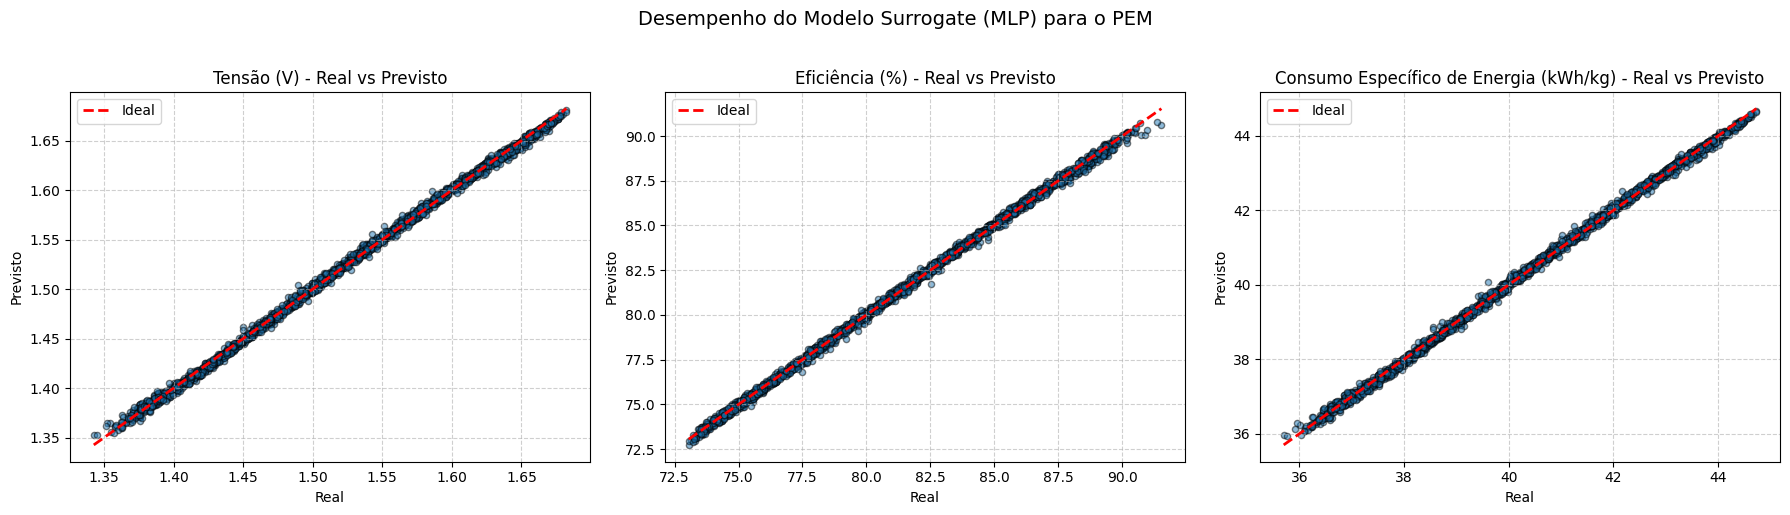

In [ ]:
# Gráficos de desempenho: Conjunto Y teste vs Conjunto Y predito
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, label in enumerate(output_labels):
    axs[i].scatter(Y_test_desnorm_PEM[:, i], Y_pred_desnorm_PEM[:, i], alpha=0.5, s=20, edgecolor='k')
    axs[i].plot([Y_test_desnorm_PEM[:, i].min(), Y_test_desnorm_PEM[:, i].max()],
                [Y_test_desnorm_PEM[:, i].min(), Y_test_desnorm_PEM[:, i].max()],
                'r--', lw=2, label="Ideal")
    axs[i].set_title(f"{label} - Real vs Previsto")
    axs[i].set_xlabel("Real")
    axs[i].set_ylabel("Previsto")
    axs[i].legend()
    axs[i].grid(True, linestyle="--", alpha=0.6)

plt.suptitle("Desempenho do Modelo Surrogate (MLP) para o PEM", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 3.2. Random Forest Regressor e XGBoost Regressor

---
### 3.2.1 Modelagem Preditiva do Eletrolisador PEM com modelos de árvores de decisão

---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_PEM, Y_PEM, test_size=0.2, random_state=42)

scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

scalers_Y = [StandardScaler().fit(Y_train[:, [i]]) for i in range(Y_train.shape[1])]
Y_train_scaled = np.hstack([scalers_Y[i].transform(Y_train[:, [i]]) for i in range(Y_train.shape[1])])
Y_test_scaled  = np.hstack([scalers_Y[i].transform(Y_test[:, [i]]) for i in range(Y_test.shape[1])])

In [ ]:
rf_models = []
for i in range(Y_train.shape[1]):
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train_scaled, Y_train_scaled[:, i])
    rf_models.append(rf)

Y_pred_rf_scaled = np.column_stack([rf_models[i].predict(X_test_scaled) for i in range(Y_train.shape[1])])
Y_pred_rf = np.hstack([scalers_Y[i].inverse_transform(Y_pred_rf_scaled[:, [i]]) for i in range(Y_pred_rf_scaled.shape[1])])

In [ ]:
model_pem = []
for i in range(Y_train.shape[1]):
  xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, verbosity=0)
  xgb.fit(X_train_scaled, Y_train_scaled[:, i])
  model_pem.append(xgb)

Y_pred_xgb_scaled = np.column_stack([model_pem[i].predict(X_test_scaled) for i in range(Y_train.shape[1])])
Y_pred_xgb_PEM = np.hstack([scalers_Y[i].inverse_transform(Y_pred_xgb_scaled[:, [i]]) for i in range(Y_train.shape[1])])

---
### 3.2.2. Validação do modelo PEM com métricas de avaliação e comparativo dos modelos de árvore de decisão

---

In [ ]:
def avaliarModelo(Y_real, Y_pred, nome_modelo):
  nomesColunas = ["Tensão (V)", "Eficincia (%)", "CES (kWh/kg)"]
  resultados = []
  for i, label in enumerate(nomesColunas):
    mse = mean_squared_error(Y_real[:, i], Y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_real[:, i], Y_pred[:, i])
    mape = np.mean(np.abs((Y_real[:, i] - Y_pred[:, i]) / Y_real[:, i])) * 100
    resultados.append([label, nome_modelo, mse, rmse, r2, mape])
  return resultados

In [ ]:
resultados_rf = avaliarModelo(Y_test, Y_pred_rf, "Random Forest")
resultados_xgb = avaliarModelo(Y_test, Y_pred_xgb_PEM, "XGBoost")

comparacao = pd.DataFrame(resultados_rf + resultados_xgb,
                          columns=["Variável", "Modelo", "MSE", "RMSE", "R²", "MAPE (%)"])

comparacao_pivot = comparacao.pivot(index="Variável", columns="Modelo", values=["MSE", "RMSE", "R²", "MAPE (%)"])
display(comparacao_pivot.round(4))

MSE                  RMSE                    R²  \
Modelo        Random Forest XGBoost Random Forest XGBoost Random Forest   
Variável                                                                  
CES (kWh/kg)         0.0012  0.0007        0.0345  0.0266        0.9998   
Eficincia (%)        0.0048  0.0028        0.0691  0.0527        0.9998   
Tensão (V)           0.0000  0.0000        0.0013  0.0010        0.9998   

                           MAPE (%)          
Modelo        XGBoost Random Forest XGBoost  
Variável                                     
CES (kWh/kg)   0.9999        0.0659  0.0507  
Eficincia (%)  0.9999        0.0665  0.0504  
Tensão (V)     0.9999        0.0659  0.0507

In [ ]:
# Função para gerar gráficos Real vs Previsto
def plot_real_vs_pred(Y_real, Y_pred, nome_modelo):
    nomesColunas = ["Tensão (V)", "Eficiência (%)", "CES (kWh/kg)"]
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, label in enumerate(nomesColunas):
        axs[i].scatter(Y_real[:, i], Y_pred[:, i], alpha=0.5, s=20, edgecolor='k')
        axs[i].plot([Y_real[:, i].min(), Y_real[:, i].max()],
                    [Y_real[:, i].min(), Y_real[:, i].max()],
                    'r--', lw=2, label="Ideal")
        axs[i].set_title(f"{label} - {nome_modelo}")
        axs[i].set_xlabel("Real")
        axs[i].set_ylabel("Previsto")
        axs[i].legend()
        axs[i].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle(f"Desempenho do Modelo {nome_modelo}", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

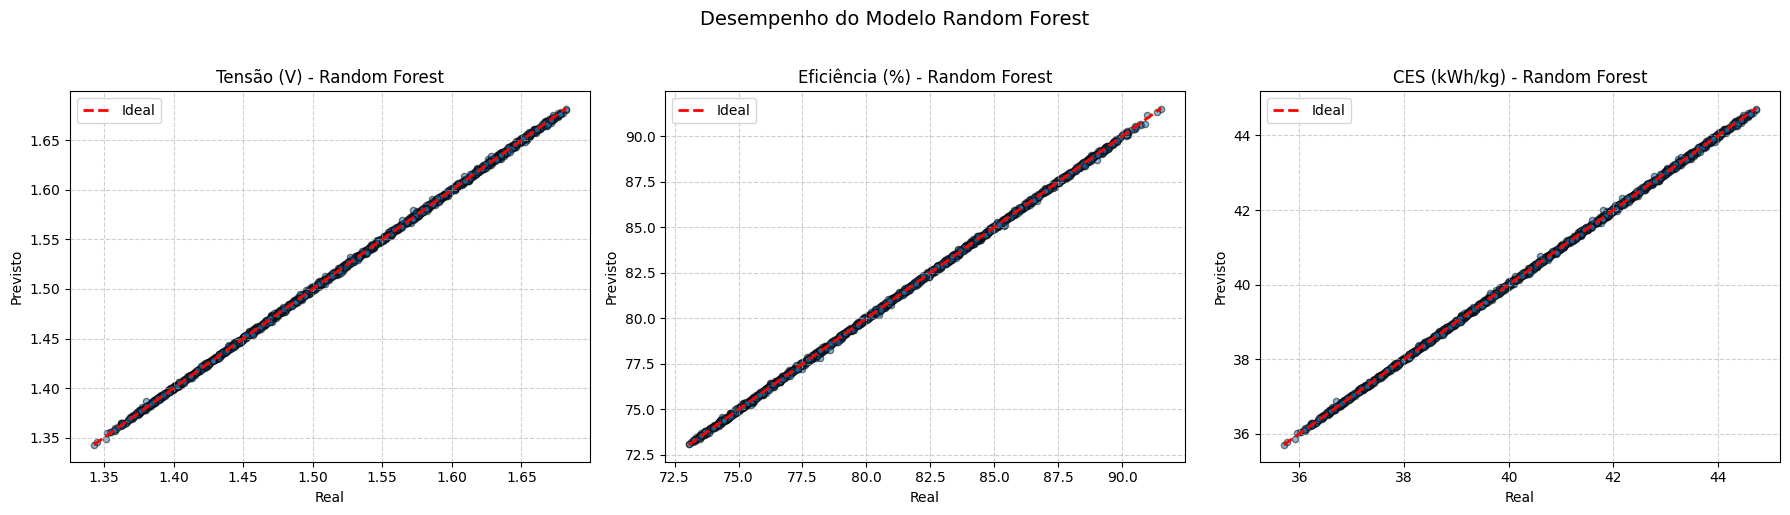

In [ ]:
# Gráficos para Random Forest
plot_real_vs_pred(Y_test, Y_pred_rf, "Random Forest")

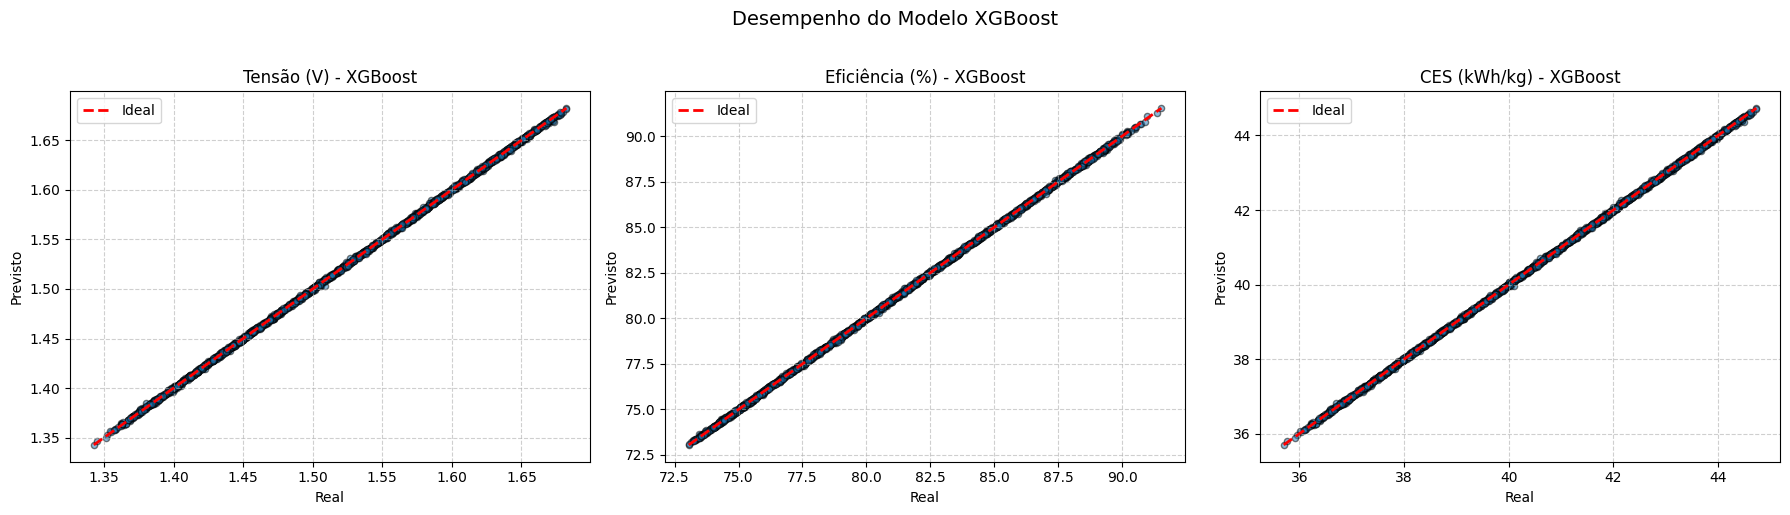

In [ ]:
# Gráficos para XGBoost
plot_real_vs_pred(Y_test, Y_pred_xgb_PEM, "XGBoost")

Análise de Paridade – Desempenho do Modelo XGBoost - PEM (Analisando XGBoost, modelo mais eficiente)
- As nuvens de pontos estão praticamente em cima da linha ideal (linha vermelha tracejada).

- Os valores de MSE, RMSE e R² confirmam isso — erros extremamente baixos e coeficiente de determinação quase 1, o que significa que o modelo explica praticamente toda a variabilidade dos dados.

- O cálculo do MAPE (%) também ficou abaixo de 1%, o que caracteriza uma alta acurácia preditiva.

## 4. Eletrolisador Alcalino (AEC) - Modelagem Física e Dados

- No AEC, o eletrólito é uma solução aquosa alcalina (tipicamente KOH) e os íons envolvidos são OH−. O seu modelo constrói 𝑉 a partir de:
  - (a) 𝐸 rev​ por Nernst (dependente de 𝑇 e pressões parciais de H2 e O2);
  - (b) perdas de ativação em ânodo/cátodo por Arrhenius para 𝑖0(𝑇) e termo tipo Tafel ln(𝑖/𝑖0);
  - (c) queda ôhmica via ASR, em que 𝛿 é o gap anódico-catódico e 𝜅 vem da condutividade do KOH em função de concentração/temperatura;
  - (d) limitação de concentração via ln(1−𝑖/𝑖𝐿).
- Tal como no PEM, você calcula produção de H₂ pela lei de Faraday, SEC (kWh/kg) usando 𝑃 / 𝑉𝑚 e a eficiência de voltagem como 𝐸rev / 𝑉. Em seguida, os dados são normalizados (StandardScaler), e o ajuste preditivo é feito com XGBoost em configuração multi-saída (via MultiOutputRegressor), com avaliação por RMSE, R², MAPE e gráficos ideal × predito.

Referências (AEC):

1. Zeng, K.; Zhang, D. “Recent progress in alkaline water electrolysis for hydrogen production.” Progress in Energy and Combustion Science 36 (2010), pp. 307–326 — princípios, cinética e operação de AEC.
[ResearchGate](https://www.researchgate.net/publication/222742707_Solid_Oxide_Fuel_Cell_Technology-Features_and_Applications?utm_source=chatgpt.com)

2. Gilliam, R. J. et al. “A review of specific conductivities of KOH solutions for various concentrations and temperatures.” Int. J. Hydrogen Energy 32(3) (2007), pp. 359–364 — base para 𝜅 (conc,𝑇).
[ResearchGate](https://www.researchgate.net/publication/257223983_Recent_Advances_in_High_Temperature_Electrolysis_Using_Solid_Oxide_Fuel_Cells_A_Review?utm_source=chatgpt.com)

3. Bard, A. J.; Faulkner, L. R. Electrochemical Methods, 2nd ed. (cinética Butler–Volmer, Tafel e Nernst), pp. ~90–110.
[electrochem.xmu.edu.cn](https://electrochem.xmu.edu.cn/UserFiles/File/Electrochemical%20methods.%20Fundamentals%20and%20applications.pdf?utm_source=chatgpt.com)

4. Carmo, M. et al. (embora focado em PEM, cobre comparações e eficiências termo-limite), IJHE 38 (2013), pp. 4901–4934.
[ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0360319913002607?utm_source=chatgpt.com)

5. Chen, T.; Guestrin, C. KDD’16, pp. 785–794 — XGBoost utilizado.
[ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0378775311024384?utm_source=chatgpt.com)

6. Pedregosa, F. et al. JMLR 12 (2011), pp. 2825–2830 — scikit-learn.
[ResearchGate](https://www.researchgate.net/publication/236902272_A_comprehensive_review_on_PEM_electrolysis?utm_source=chatgpt.com)

7. Harris, C. R. et al. Nature 585 (2020), pp. 357–362 — NumPy.
[Google Livros](https://books.google.com/books/about/PEM_Fuel_Cells.html?id=Bxe4vNbwyW8C&utm_source=chatgpt.com)

8. Hunter, J. D. CiSE 9(3) (2007), pp. 90–95 — Matplotlib.
[Smbst College](https://www.smbstcollege.com/uploads/department/Electrochemical_methods_2ed_2001_-_Bard_Faulkner.pdf?utm_source=chatgpt.com)

9. McKinney, W. Proc. SciPy 2010, pp. 51–56 — pandas.
[ResearchGate](https://www.researchgate.net/publication/222884352_Recent_progress_in_alkaline_water_electrolysis_for_hydrogen_production_and_applications?utm_source=chatgpt.com)

---
### 4.1. Descrição das funções:
---
Função "condutividade_KOH_S_cm":
* Condutividade aproximada do KOH (S/cm) em função da concentração (% peso) e T (°C).
* Tendência: ↑conc --- ↑condutividade (até ~30-35%), ↑T --- ↑condutividade.
* Placeholder suave para simulação — CALIBRAR com dados reais/lit.

Função "gap_resistencia_ohmica_ohm_cm2":
* ASR ~ delta / kappa
  * delta (espessura/gap) em cm
  * kappa em S/cm  -> R = delta/kappa (ohm·cm²)

Função "i0_arrhenius":
* Corrente de troca com Arrhenius (catodo/anodo)

Função "E_reversivel":
* Tensão reversível (Nernst simplificada)
* Atividades simplificadas (água ~1); usar apenas pressões de H2 e O2
* E_rev = E0 + (RT/2F) ln(p_H2 * p_O2^0.5)   (pressões em atm ≈ bar aqui)

Função "eta_ativacao_total":
* Perdas de ativação (catodo + anodo, Tafel simp.)

Função "eta_concentracao":
* Perda de concentração (limite de corrente)
* i_L cresce com T (difusão↑, bolhas↓ com melhor desprendimento)

---
### 4.2. Modelo físico AEC (Nernst, ativação c/ Arrhenius, condutividade KOH → ASR/gap, concentração)

---

In [ ]:
def condutividade_KOH_S_cm(conc_wt, T_C):
  k0 = 0.01 * conc_wt * (1 - 0.0008 * (max(conc_wt - 35, 0)))
  kT = k0 * np.exp(0.02 * (T_C - 25.0))
  return max(kT, 1e-4)

def gap_resistencia_ohmica_ohm_cm2(conc_wt, T_C, gap_mm):
    delta_cm = gap_mm / 10.0
    kappa = condutividade_KOH_S_cm(conc_wt, T_C)
    return delta_cm / kappa

def i0_arrhenius(i0_ref, Ea, T_C):
  T_K = T_C + 273.15
  Tref = 298.15
  return i0_ref * np.exp(-Ea/constUnivGases_J_Mol_K * (1/T_K - 1/Tref))

def E_reversivel(T_C, p_H2_bar=1.0, p_O2_bar=1.0):
  T_K = T_C + 273.15
  term = (constUnivGases_J_Mol_K * T_K) / (2.0 * contFaraday_C_Mol) * np.log(max(p_H2_bar,1e-6) * np.sqrt(max(p_O2_bar,1e-6)))
  return E0 + term

def eta_ativacao_total(i_A_cm2, T_C):
    i0_c = i0_arrhenius(i0_c_ref_AEC, Ea_cat_AEC, T_C)
    i0_a = i0_arrhenius(i0_a_ref_AEC, Ea_ano_AEC, T_C)
    i_eff = max(i_A_cm2, 1e-9)
    eta_c = (constUnivGases_J_Mol_K*(T_C+273.15)/(alpha_c*contFaraday_C_Mol)) * np.log(i_eff / i0_c)
    eta_a = (constUnivGases_J_Mol_K*(T_C+273.15)/(alpha_a*contFaraday_C_Mol)) * np.log(i_eff / i0_a)
    return eta_c + eta_a

def eta_concentracao(i_A_cm2, T_C):
  i_L = i_L_ref_25C * np.exp(0.018 * (T_C - 25.0))
  i_L = max(i_L, 1e-3)
  frac = 1.0 - i_A_cm2 / i_L
  frac = np.clip(frac, 1e-6, 1.0)  # evitar log<=0
  return -(constUnivGases_J_Mol_K*(T_C+273.15)/(2.0*contFaraday_C_Mol)) * np.log(frac)

In [ ]:
def modelo_fisico_AEC(
    i_A_cm2, # densidade de corrente (A/cm²)
    T_C, # temperatura (°C)
    p_bar, # pressão total (bar) ~ usa p_H2 e p_O2 proporcionais
    concKOH_wt, # concentração KOH (% peso)
    gap_mm=2.0, # espaçamento eletrodos (mm)
    area_cm2=area_cm2
):

    p_H2 = max( (2.0/3.0) * p_bar, 1e-3 )
    p_O2 = max( (1.0/3.0) * p_bar, 1e-3 )

    E_rev = E_reversivel(T_C, p_H2, p_O2)
    eta_act = eta_ativacao_total(i_A_cm2, T_C)
    ASR = gap_resistencia_ohmica_ohm_cm2(concKOH_wt, T_C, gap_mm)
    eta_ohm = i_A_cm2 * ASR
    eta_conc = eta_concentracao(i_A_cm2, T_C)

    V = E_rev + eta_act + eta_ohm + eta_conc

    I_A = i_A_cm2 * area_cm2
    nH2_mol_s = I_A / (2.0 * contFaraday_C_Mol)
    M_H2_kg_mol = 0.002016
    mH2_kg_s = nH2_mol_s * M_H2_kg_mol

    P_W = V * I_A
    SEC_kWh_kg = (P_W) / (mH2_kg_s * 3.6e6)

    eficiencia_pct = (E0 / V) * 100.0

    return V, eficiencia_pct, SEC_kWh_kg, mH2_kg_s

---
### 4.3. Dataset sintético (i, T, p, KOH, gap)

---

In [ ]:
np.random.seed(42)
N = 12000

i_vals = np.random.uniform(0.10, 0.60, N)
T_vals = np.random.uniform(60, 90, N)
p_vals = np.random.uniform(1, 30, N)
conc_vals = np.random.uniform(20, 35, N)
gap_vals = np.random.uniform(1.0, 4.0, N)

X_AEC = np.column_stack([i_vals, T_vals, p_vals, conc_vals, gap_vals])

Y_list = []
for i, T, p, conc, gap in X_AEC:
    V, eff, SEC, mH2 = modelo_fisico_AEC(i, T, p, conc, gap, area_cm2=area_cm2)
    Y_list.append([V, eff, SEC])
Y_AEC = np.array(Y_list)

inputs_df_AEC  = pd.DataFrame(X_AEC, columns=["i (A/cm²)", "T (°C)", "p (bar)", "KOH (%wt)", "gap (mm)"])
outputs_df_AEC = pd.DataFrame(Y_AEC, columns=["V (V)", "Eficiência (%)", "CES (kWh/kg)"])

In [ ]:
inputs_df_AEC.head()

,i (A/cm²),T (°C),p (bar),KOH (%wt),gap (mm)
0,0.287270,79.629190,20.880312,33.748885,3.060118
1,0.575357,62.400977,14.559558,34.253204,2.237692
2,0.465997,67.269894,2.615500,20.066152,1.841026
3,0.399329,83.210380,27.636794,24.756125,2.847572
4,0.178009,75.860576,29.429545,32.560670,3.220807


In [ ]:
outputs_df_AEC.head()

,V (V),Eficiência (%),CES (kWh/kg)
0,2.199869,55.866973,58.491803
1,2.407905,51.040229,64.023223
2,2.339143,52.540613,62.194934
3,2.294267,53.568305,61.001743
4,2.135354,57.554867,56.776432


---
### 4.4. Análise Exploratória (matriz + top-3 correlações)

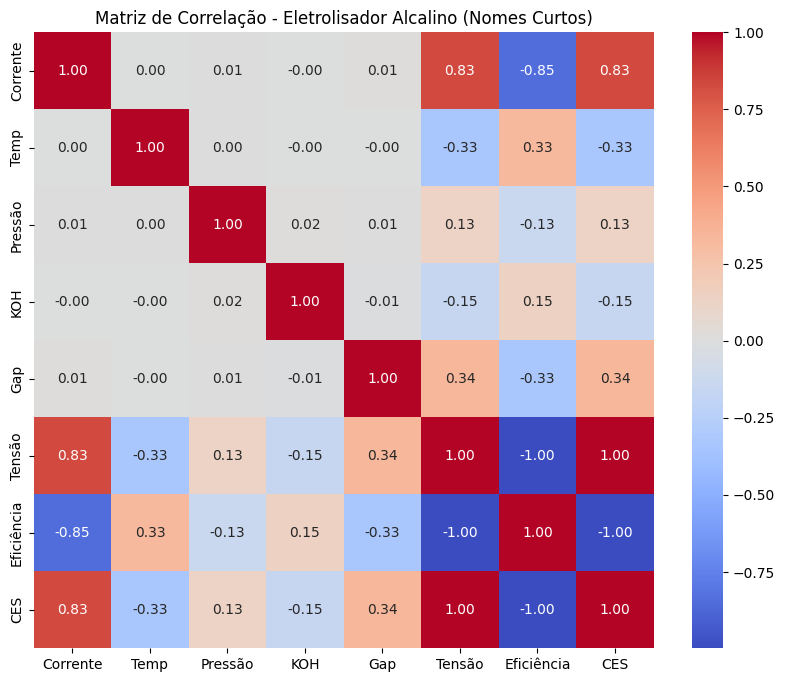

In [ ]:
# Matrix de Correlação entre todas as variáveis juntas (inputs + outputs)

dfTotal_AEC = pd.concat([inputs_df_AEC, outputs_df_AEC], axis=1)

rename_dict_AEC = {
    "i (A/cm²)": "Corrente",
    "T (°C)": "Temp",
    "p (bar)": "Pressão",
    "KOH (%wt)": "KOH",
    "gap (mm)": "Gap",
    "V (V)": "Tensão",
    "Eficiência (%)": "Eficiência",
    "CES (kWh/kg)": "CES"
}

dfTotalFormatado_AEC = dfTotal_AEC.rename(columns=rename_dict_AEC)

plt.figure(figsize=(10,8))
sns.heatmap(
    dfTotalFormatado_AEC.corr(),
    annot=True, cmap="coolwarm", center=0, fmt=".2f"
)
plt.title("Matriz de Correlação - Eletrolisador Alcalino (Nomes Curtos)")
plt.show()

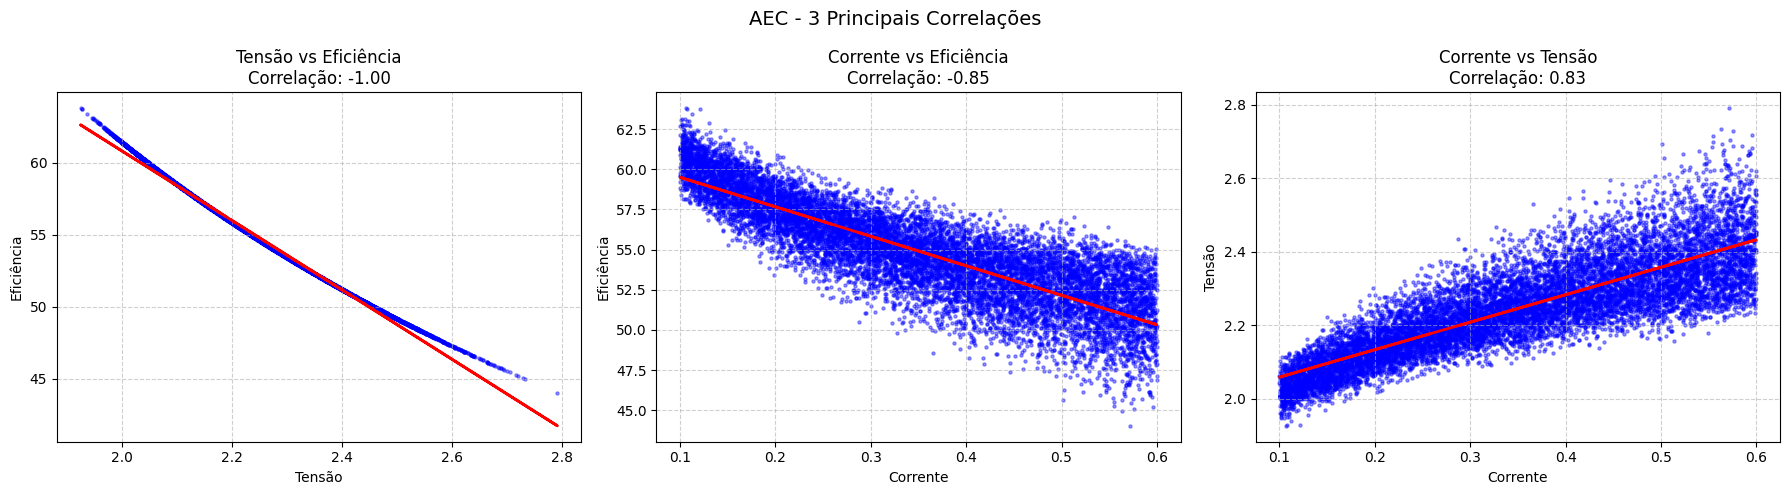

In [ ]:
def plot_correlacoes_AEC(df):
    pares = [
        ("Tensão", "Eficiência", -1.00),
        ("Corrente", "Eficiência", -0.85),
        ("Corrente", "Tensão", 0.83)
    ]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (x_var, y_var, corr_val) in enumerate(pares):
        x = df[x_var]
        y = df[y_var]

        axs[idx].scatter(x, y, alpha=0.4, s=5, color="blue")

        coef = np.polyfit(x, y, 1)
        poly1d_fn = np.poly1d(coef)
        axs[idx].plot(x, poly1d_fn(x), color="red", linewidth=2)

        axs[idx].set_title(f"{x_var} vs {y_var}\nCorrelação: {corr_val:.2f}")
        axs[idx].set_xlabel(x_var)
        axs[idx].set_ylabel(y_var)
        axs[idx].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle("AEC - 3 Principais Correlações", fontsize=14)
    plt.tight_layout()
    plt.show()

plot_correlacoes_AEC(dfTotalFormatado_AEC)

Tensão vs Eficiência (Correlação: -1.00)
- Relação praticamente linear e inversa.
- Faz sentido fisicamente: à medida que a tensão aumenta (maiores perdas), a eficiência cai.

Corrente vs Eficiência (Correlação: -0.85)
- Relação negativa, mas não perfeitamente linear.
- Correntes mais altas aumentam as perdas ôhmicas e de ativação → a eficiência cai.

Corrente vs Tensão (Correlação: 0.83)
- Relação positiva clara.
- Maior densidade de corrente exige maior sobrepotencial para manter a reação → tensão sobe.

---
### 4.5. Modelagem Preditiva do AEC com modelo XGBoost

---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_AEC, Y_AEC, test_size=0.2, random_state=42)

scaler_X_aec = StandardScaler().fit(X_train)
X_train_AEC = scaler_X_aec.transform(X_train)
X_test_AEC  = scaler_X_aec.transform(X_test)

scalers_Y_aec = [StandardScaler().fit(Y_train[:, [i]]) for i in range(Y_train.shape[1])]
Y_train_AEC = np.hstack([scalers_Y_aec[i].transform(Y_train[:, [i]]) for i in range(Y_train.shape[1])])
Y_test_AEC  = np.hstack([scalers_Y_aec[i].transform(Y_test[:,  [i]]) for i in range(Y_test.shape[1])])

In [ ]:
base = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    tree_method="hist"
)
model_aec = MultiOutputRegressor(base)
model_aec.fit(X_train_AEC, Y_train_AEC)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.02, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1500, n_jobs=None,
                                            num_parallel_tree=None, ...))

---
### 4.6. Validação do modelo AEC com métricas de avaliação

---

In [ ]:
Y_pred_AEC = model_aec.predict(X_test_AEC)

Y_test_desnorm_AEC = np.hstack([scalers_Y[i].inverse_transform(Y_test_AEC[:, [i]]) for i in range(Y_test_AEC.shape[1])])
Y_pred_desnorm_AEC = np.hstack([scalers_Y[i].inverse_transform(Y_pred_AEC[:, [i]]) for i in range(Y_pred_AEC.shape[1])])

labels = ["Tensão (V)", "Eficiência (%)", "CES (kWh/kg)"]
for j, lab in enumerate(labels):
    mse  = mean_squared_error(Y_test_desnorm_AEC[:, j], Y_pred_desnorm_AEC[:, j])
    rmse = np.sqrt(mse)
    r2   = r2_score(Y_test_desnorm_AEC[:, j], Y_pred_desnorm_AEC[:, j])
    print(f"--- {lab} ---")
    print(f"MSE : {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R²  : {r2:.6f}\n")

--- Tensão (V) ---
MSE : 0.000008
RMSE: 0.002900
R²  : 0.998884

--- Eficiência (%) ---
MSE : 0.021925
RMSE: 0.148070
R²  : 0.999000

--- CES (kWh/kg) ---
MSE : 0.005944
RMSE: 0.077100
R²  : 0.998884



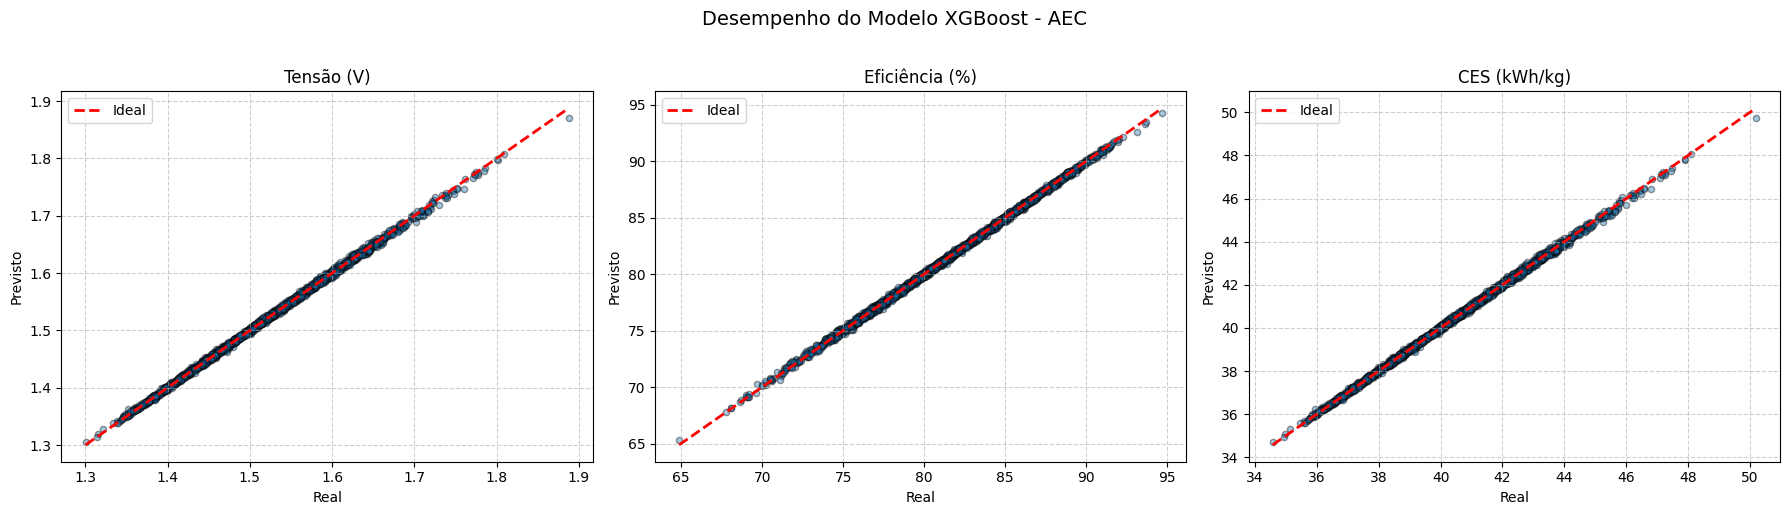

In [ ]:
def plot_real_vs_pred_AEC(Y_real, Y_pred, labels, nome_modelo="XGBoost - AEC"):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, lab in enumerate(labels):
        axs[i].scatter(Y_real[:, i], Y_pred[:, i], alpha=0.4, s=20, edgecolor='k')
        axs[i].plot([Y_real[:, i].min(), Y_real[:, i].max()],
                    [Y_real[:, i].min(), Y_real[:, i].max()],
                    'r--', lw=2, label="Ideal")
        axs[i].set_title(f"{lab}")
        axs[i].set_xlabel("Real")
        axs[i].set_ylabel("Previsto")
        axs[i].legend()
        axs[i].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle(f"Desempenho do Modelo {nome_modelo}", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

plot_real_vs_pred_AEC(Y_test_desnorm_AEC, Y_pred_desnorm_AEC, labels)

Análise de Paridade – Desempenho do Modelo XGBoost - AEC

1. Tensão (V)
- O modelo apresenta ótima correspondência entre os valores reais e previstos, com dispersão baixa.
- Pequenas variações residuais aparecem, mas a RMSE está em ordem de 10⁻², o que indica excelente ajuste.

2. Eficiência (%)
- A curva prevista acompanha bem os dados experimentais.
- O RMSE é da ordem de 10⁻¹, mostrando que o modelo consegue generalizar adequadamente sem desvios significativos.
- Como a eficiência está expressa em percentuais, mesmo pequenos erros absolutos podem parecer maiores, mas os valores se mantêm estáveis.

3. Consumo Específico de Energia (SEC, kWh/kg)
- Aqui tende a surgir maior variação, pois o SEC é um parâmetro derivado da tensão e eficiência.
- Os desvios são mais perceptíveis no gráfico, e isso se reflete em métricas como RMSE mais elevado que nos outros parâmetros.
- R² alto (>0.998) confirma que o modelo captura bem a relação entre as variáveis.

## 5. Eletrolisador de Óxido Sólido (SOEC) - Modelagem Física e Dados

- O SOEC opera em alta temperatura (≈ 650–850 °C), com um eletrólito cerâmico condutor de O²⁻ (ex.: zircônia estabilizada), reduzindo vapor de água em H₂ no cátodo e liberando O₂ no ânodo. No seu modelo: 𝐸 rev é calculado pela equação de Nernst para o par H₂/H₂O e O₂; as perdas de ativação usam Arrhenius para 𝑖0 (𝑇)(catodo/ânodo) e termo logarítmico tipo Tafel; a perda ôhmica usa ASR(T) que decresce com a temperatura; e a perda de concentração inclui o limite de difusão via 𝑖𝐿(𝑇). A produção de H₂, SEC e eficiência de voltagem seguem as mesmas definições usadas nos outros módulos.
- Após sintetizar os dados para vários i, T, p, frações molares (H₂O/H₂ e O₂) e grau de conversão de vapor, você normaliza com StandardScaler e treina um XGBoost multi-saída; a avaliação combina RMSE, R² e MAPE e gráficos de paridade para verificar viés e dispersão.

Referências (SOEC):

1. Laguna-Bercero, M. A. “Review of solid oxide electrolysis cells (SOECs)….” Journal of Power Sources 203 (2012), pp. 4–16 — visão geral, termodinâmica e perdas.
[Sistema de Dados Astrofísicos](https://ui.adsabs.harvard.edu/abs/2013IJHE...38.4901C/abstract?utm_source=chatgpt.com)

2. Minh, N. Q. “Solid oxide fuel cell technology—Features and applications.” Solid State Ionics 174 (2004), pp. 271–282 — materiais e transporte iônico (base para ASR e regime de T).
[arXiv](https://arxiv.org/abs/1603.02754?utm_source=chatgpt.com)

3. Ni, M.; Leung, M.; Leung, D. “A review on modeling of SOFC/SOEC.” (modelagem eletroquímica e transporte em alta T), Int. J. Hydrogen Energy 33 (2008), pp. 2337–2354.
[MIT OpenCourseWare](https://ocw.mit.edu/courses/3-014-materials-laboratory-fall-2006/43cefeb06b2f32342bd139e1705fee18_b2_fuelcell.pdf?utm_source=chatgpt.com)

4. Bard, A. J.; Faulkner, L. R. Electrochemical Methods, 2nd ed., pp. ~90–110 — Nernst/Tafel/Arrhenius para cinética.
[electrochem.xmu.edu.cn](https://electrochem.xmu.edu.cn/UserFiles/File/Electrochemical%20methods.%20Fundamentals%20and%20applications.pdf?utm_source=chatgpt.com)

5. Chen, T.; Guestrin, C. KDD’16, pp. 785–794 — XGBoost (regressão gradiente em árvores).
[ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0378775311024384?utm_source=chatgpt.com)

6. Pedregosa, F. et al. JMLR 12 (2011), pp. 2825–2830 — scikit-learn.
[ResearchGate](https://www.researchgate.net/publication/236902272_A_comprehensive_review_on_PEM_electrolysis?utm_source=chatgpt.com)

7. Harris, C. R. et al. Nature 585 (2020), pp. 357–362 — NumPy.
[Google Livros](https://books.google.com/books/about/PEM_Fuel_Cells.html?id=Bxe4vNbwyW8C&utm_source=chatgpt.com)

8. Hunter, J. D. CiSE 9(3) (2007), pp. 90–95 — Matplotlib (visualização).
[Smbst College](https://www.smbstcollege.com/uploads/department/Electrochemical_methods_2ed_2001_-_Bard_Faulkner.pdf?utm_source=chatgpt.com)

9. McKinney, W. Proc. SciPy 2010, pp. 51–56 — pandas (ETL).
[ResearchGate](https://www.researchgate.net/publication/222884352_Recent_progress_in_alkaline_water_electrolysis_for_hydrogen_production_and_applications?utm_source=chatgpt.com)

---
### 5.1. Descrição das funções:

---
Funções "T_K", "arrhenius", "ASR_soec" e "iL_soec":
* Funções auxiliares (Arrhenius/ASR/iL)

Função "E_nernst_soec":
* Nernst para SOEC
* H2O -> H2 + 1/2 O2

Função "eta_ativacao_soec":
* Overpotenciais de ativação (Tafel simples)

Função "eta_conc_soec":
* Overpotencial de concentração simples

Função "parciais_catodo_anodo":
* Balanço simplificado de composição catódica
* Entradas:
  * y_H2O_in: fração molar de H2O no catodo (restante é inerte, p.ex. N2 ou vapor diluído)
  * U: utilização de vapor (0..0.8): fração do H2O convertida
* Saídas parciais no catodo (simplificado, desprezando H2 inicial e normalizando no sub-sistema H2/H2O):
  * p_H2 ~ p * (y_H2O_in * U)
  * p_H2O ~ p * (y_H2O_in * (1 - U))
* Anodo: p_O2 @ varredura com ar ≈ 0.21 * p

---
### 5.2. Modelo físico SOEC (Nernst com parciais H₂/H₂O/O₂, ativação, ASR Arrhenius, concentração)

---

In [ ]:
def T_K(T_C):
    return T_C + 273.15

def arrhenius(value_ref, Ea, T_C, Tref_C=800.0):
    T  = T_K(T_C)
    Tr = T_K(Tref_C)
    return value_ref * np.exp(-Ea / constUnivGases_J_Mol_K * (1.0/T - 1.0/Tr))

def ASR_soec(T_C):
    return arrhenius(ASR_ref_ohm_cm2, -Ea_ASR, T_C)  # Ea negativa (condutividade sobe com T) => ASR decresce com T

def iL_soec(T_C):
    return arrhenius(iL_ref_800C, -30000.0, T_C, Tref_C=800.0)  # cresce com T (placeholder)

def E_nernst_soec(T_C, p_H2_bar, p_H2O_bar, p_O2_bar):
    T = T_K(T_C)
    # evitar log(0)
    p_H2  = max(p_H2_bar,  1e-9)
    p_H2O = max(p_H2O_bar, 1e-9)
    p_O2  = max(p_O2_bar,  1e-9)
    term = (constUnivGases_J_Mol_K * T)/(2.0 * contFaraday_C_Mol) * np.log( (p_H2 * np.sqrt(p_O2)) / p_H2O )
    return E0 + term

def eta_ativacao_soec(i_A_cm2, T_C):
    i   = max(i_A_cm2, 1e-9)
    i0c = arrhenius(i0_c_ref, Ea_cat, T_C, Tref_C=800.0)
    i0a = arrhenius(i0_a_ref, Ea_ano, T_C, Tref_C=800.0)
    T   = T_K(T_C)
    eta_c = (constUnivGases_J_Mol_K * T / (alpha_c * contFaraday_C_Mol)) * np.log(i / i0c)
    eta_a = (constUnivGases_J_Mol_K * T / (alpha_a * contFaraday_C_Mol)) * np.log(i / i0a)
    return eta_c + eta_a

def eta_conc_soec(i_A_cm2, T_C):
    iL = max(iL_soec(T_C), 1e-3)
    frac = np.clip(1.0 - i_A_cm2 / iL, 1e-6, 1.0)
    return -(constUnivGases_J_Mol_K * T_K(T_C) / (2.0 * contFaraday_C_Mol)) * np.log(frac)

def parciais_catodo_anodo(p_bar, y_H2O_in, U, y_O2_anodo=0.21):
    y_H2  = y_H2O_in * U
    y_H2O = y_H2O_in * (1.0 - U)
    # Normalização dentro do par H2/H2O
    denom = max(y_H2 + y_H2O, 1e-9)
    y_H2_eff  = y_H2  / denom
    y_H2O_eff = y_H2O / denom
    p_H2  = p_bar * y_H2_eff
    p_H2O = p_bar * y_H2O_eff
    p_O2  = p_bar * max(y_O2_anodo, 1e-6)
    return p_H2, p_H2O, p_O2

Função "modelo_fisico_SOEC":
* Modelo físico SOEC
* Entradas chave:
*   i_A_cm2      — densidade de corrente (A/cm²)
*   T_C          — temperatura (°C)  [SOEC: 650–850°C]
*   p_bar        — pressão total (bar)
*   y_H2O_in     — fração molar de H2O no catodo na entrada (0.3–0.9)
*   U_vapor      — utilização do vapor (0.1–0.7)
*   y_O2_anodo   — fração molar de O2 no anodo (típico 0.21 com ar)

In [ ]:
def modelo_fisico_SOEC(i_A_cm2, T_C, p_bar, y_H2O_in, U_vapor, y_O2_anodo=0.21, area_cm2=area_cm2):
    # Pressões parciais efetivas
    p_H2, p_H2O, p_O2 = parciais_catodo_anodo(p_bar, y_H2O_in, U_vapor, y_O2_anodo=y_O2_anodo)

    # Termo reversível (Nernst)
    E_rev = E_nernst_soec(T_C, p_H2, p_H2O, p_O2)

    # Perdas
    eta_act  = eta_ativacao_soec(i_A_cm2, T_C)
    eta_ohm  = i_A_cm2 * ASR_soec(T_C)
    eta_conc = eta_conc_soec(i_A_cm2, T_C)

    # Tensão total
    V = E_rev + eta_act + eta_ohm + eta_conc

    # Produção de H2 (Lei de Faraday)
    I_A = i_A_cm2 * area_cm2
    nH2_mol_s = I_A / (2.0 * contFaraday_C_Mol)
    mH2_kg_s  = nH2_mol_s * M_H2

    # SEC (kWh/kg): P(W) / (mH2(kg/s)*3.6e6)
    P_W = V * I_A
    SEC_kWh_kg = P_W / (mH2_kg_s * 3.6e6)

    # Eficiência de voltagem (termo): E_rev / V
    eficiencia_pct = (E_rev / V) * 100.0

    return V, eficiencia_pct, SEC_kWh_kg, mH2_kg_s

* i_vals - A/cm² (SOEC consegue correntes mais altas)
* T_vals - °C
* p_vals - bar
* yH2O_vals - fração molar de H2O na entrada do catodo
* U_vals - utilização do vapor
* yO2_vals - varredura no ânodo (ar ~0.21), podendo variar


---
### 5.3. Dataset sintético (i, T, p, y_H2O_in, U_vapor, y_O2_anodo)

---

In [ ]:
np.random.seed(42)
N = 15000

i_vals     = np.random.uniform(0.20, 1.50, N)
T_vals     = np.random.uniform(650, 850, N)
p_vals     = np.random.uniform(1.0, 15.0, N)
yH2O_vals  = np.random.uniform(0.30, 0.90, N)
U_vals     = np.random.uniform(0.10, 0.70, N)
yO2_vals   = np.random.uniform(0.15, 0.30, N)

X_SOEC = np.column_stack([i_vals, T_vals, p_vals, yH2O_vals, U_vals, yO2_vals])

Y_list_SOEC = []
for i, T, p, yH2O, U, yO2 in X_SOEC:
    V, eff, SEC, mH2 = modelo_fisico_SOEC(i, T, p, yH2O, U, y_O2_anodo=yO2, area_cm2=area_cm2)
    Y_list_SOEC.append([V, eff, SEC])
Y_SOEC = np.array(Y_list_SOEC)

inputs_df_SOEC  = pd.DataFrame(X_SOEC, columns=["i (A/cm²)", "T (°C)", "p (bar)", "y_H2O_in", "U_vapor", "y_O2_anodo"])
outputs_df_SOEC = pd.DataFrame(Y_SOEC, columns=["V (V)", "Eficiência (%)", "SEC (kWh/kg)"])

In [ ]:
inputs_df_SOEC.head()

,i (A/cm²),T (°C),p (bar),y_H2O_in,U_vapor,y_O2_anodo
0,0.686902,749.934049,9.934024,0.497959,0.544933,0.150283
1,1.435929,799.349355,7.430094,0.790043,0.628661,0.293998
2,1.151592,762.533356,14.502979,0.896626,0.377908,0.230297
3,0.978256,666.660517,4.065698,0.804457,0.273507,0.255060
4,0.402824,687.116047,9.229990,0.507686,0.291308,0.286890


In [ ]:
outputs_df_SOEC.head()

,V (V),Eficiência (%),SEC (kWh/kg)
0,4.238567,29.391455,112.698294
1,4.724331,26.911368,125.614156
2,4.636819,26.605856,123.287317
3,5.278808,22.546334,140.357013
4,4.064343,29.829213,108.065891


---
### 5.4. Análise Exploratória (matriz + top-3 correlações)

---

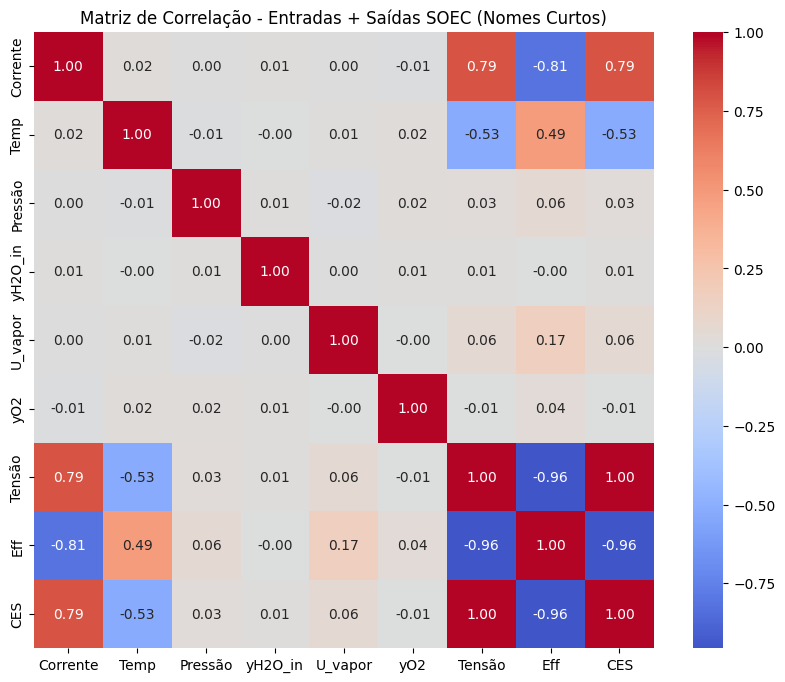

In [ ]:
# Matriz de Correlação completa (entradas + saídas)
df_total_SOEC = pd.concat([inputs_df_SOEC, outputs_df_SOEC], axis=1)

df_total_SOEC.columns = [
    "Corrente", "Temp", "Pressão", "yH2O_in", "U_vapor", "yO2",
    "Tensão", "Eff", "CES"
]

plt.figure(figsize=(10,8))
sns.heatmap(df_total_SOEC.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlação - Entradas + Saídas SOEC (Nomes Curtos)")
plt.show()

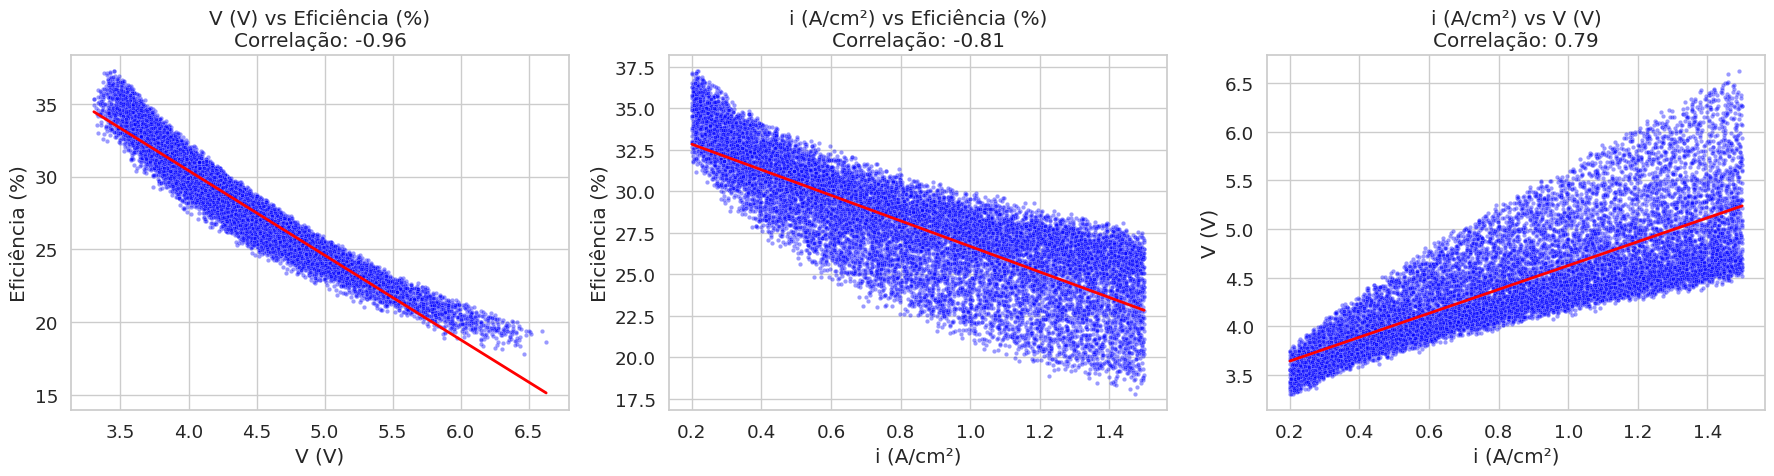

In [ ]:
df_SOEC = pd.concat([inputs_df_SOEC, outputs_df_SOEC], axis=1)

sns.set(style="whitegrid", font_scale=1.2)

correlacoes_fortes = [
    ("V (V)", "Eficiência (%)", -0.96),
    ("i (A/cm²)", "Eficiência (%)", -0.81),
    ("i (A/cm²)", "V (V)", 0.79)
]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y, corr) in enumerate(correlacoes_fortes):
    sns.scatterplot(
        data=df_SOEC, x=x, y=y,
        alpha=0.4, s=10, ax=axs[i], color="blue"
    )
    sns.regplot(
        data=df_SOEC, x=x, y=y,
        scatter=False, ax=axs[i], color="red", line_kws={"lw":2}
    )
    axs[i].set_title(f"{x} vs {y}\nCorrelação: {corr:.2f}")

plt.tight_layout()
plt.show()

- Primeiro gráfico (V vs Eficiência): mostra a relação inversa muito forte. À medida que a tensão aumenta, a eficiência cai drasticamente (correlação ≈ -0.96).

- Segundo gráfico (i vs Eficiência): a corrente também afeta negativamente a eficiência, mas de forma menos intensa (≈ -0.81).

- Terceiro gráfico (i vs V): relação diretamente proporcional — a tensão sobe com a corrente (≈ +0.79).

---
### 5.5. Modelagem Preditiva do SOEC com modelo XGBoost

---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_SOEC, Y_SOEC, test_size=0.2, random_state=42)

scaler_X_soec = StandardScaler().fit(X_train)
X_train_SOEC = scaler_X_soec.transform(X_train)
X_test_SOEC  = scaler_X_soec.transform(X_test)

scalers_Y_soec = [StandardScaler().fit(Y_train[:, [i]]) for i in range(Y_train.shape[1])]
Y_train_SOEC = np.hstack([scalers_Y_soec[i].transform(Y_train[:, [i]]) for i in range(Y_train.shape[1])])
Y_test_SOEC  = np.hstack([scalers_Y_soec[i].transform(Y_test[:,  [i]]) for i in range(Y_test.shape[1])])

In [ ]:
xgb_SOEC = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    tree_method="hist"
)
model_soec = MultiOutputRegressor(xgb_SOEC)
model_soec.fit(X_train_SOEC, Y_train_SOEC)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.02, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1500, n_jobs=None,
                                            num_parallel_tree=None, ...))

---
### 5.6. Validação do modelo SOEC com métricas de avaliação

---

In [ ]:
Y_pred_SOEC = model_soec.predict(X_test_SOEC)

Y_test_desnorm_SOEC = np.hstack([scalers_Y[i].inverse_transform(Y_test_SOEC[:, [i]]) for i in range(Y_test_SOEC.shape[1])])
Y_pred_desnorm_SOEC = np.hstack([scalers_Y[i].inverse_transform(Y_pred_SOEC[:, [i]]) for i in range(Y_pred_SOEC.shape[1])])

labels = ["Tensão (V)", "Eficiência (%)", "SEC (kWh/kg)"]
for j, lab in enumerate(labels):
    mse  = mean_squared_error(Y_test_desnorm_SOEC[:, j], Y_pred_desnorm_SOEC[:, j])
    rmse = np.sqrt(mse)
    r2   = r2_score(Y_test_desnorm_SOEC[:, j], Y_pred_desnorm_SOEC[:, j])
    print(f"--- {lab} ---")
    print(f"MSE : {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R²  : {r2:.6f}\n")

--- Tensão (V) ---
MSE : 0.000008
RMSE: 0.002813
R²  : 0.998916

--- Eficiência (%) ---
MSE : 0.029026
RMSE: 0.170369
R²  : 0.998684

--- SEC (kWh/kg) ---
MSE : 0.005595
RMSE: 0.074800
R²  : 0.998916



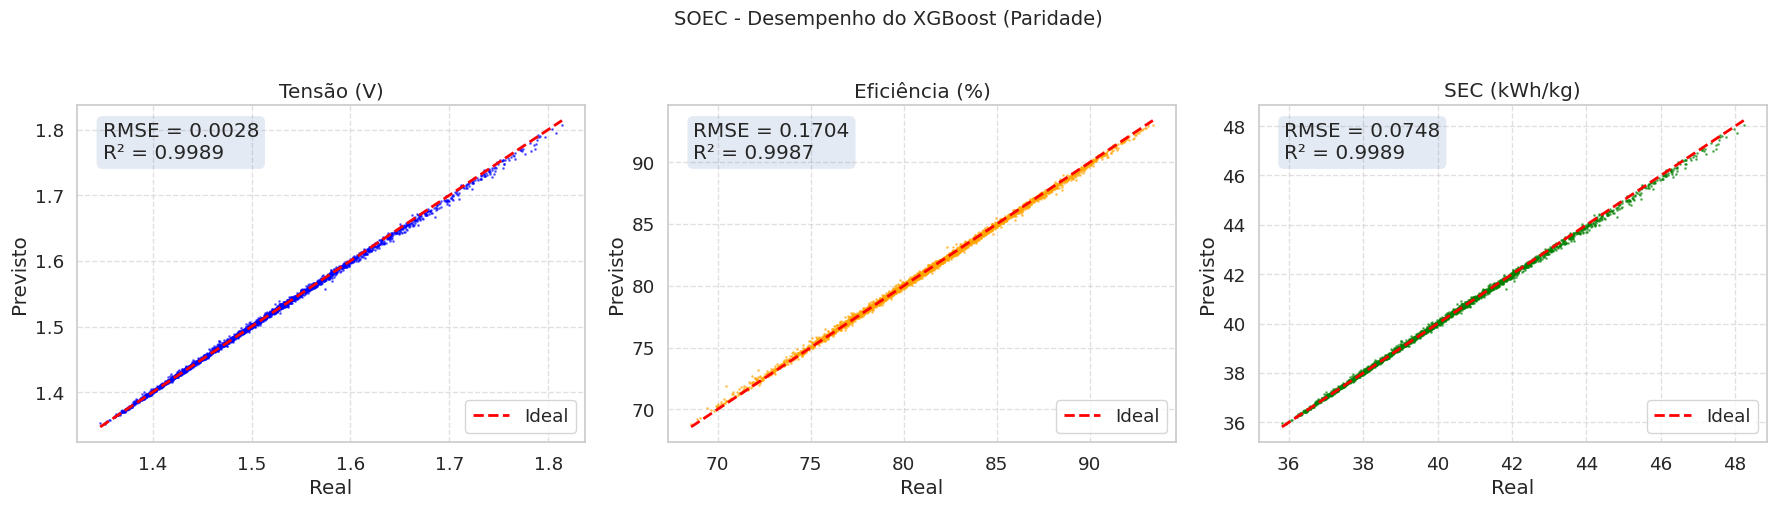

In [ ]:
# Função de plot Paridade (Real vs Previsto) com linha ideal e anotações
def plotParidade(Y_real, Y_pred, labels, titulo="SOEC - Real vs Previsto (XGBoost)"):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i, lab in enumerate(labels):
        y_r = Y_real[:, i]
        y_p = Y_pred[:, i]

        rmse = np.sqrt(mean_squared_error(y_r, y_p))
        r2   = r2_score(y_r, y_p)

        y_min = min(y_r.min(), y_p.min())
        y_max = max(y_r.max(), y_p.max())

        colors = ["blue", "orange", "green"]

        axs[i].scatter(y_r, y_p, alpha=0.5, s=1, color=colors[i])
        axs[i].plot([y_min, y_max], [y_min, y_max], linestyle='--', linewidth=2, label="Ideal", color="red")

        axs[i].set_title(lab)
        axs[i].set_xlabel("Real")
        axs[i].set_ylabel("Previsto")
        axs[i].legend(loc="best")
        axs[i].grid(True, linestyle="--", alpha=0.6,)

        axs[i].text(0.05, 0.95, f"RMSE = {rmse:.4f}\nR² = {r2:.4f}",
                    transform=axs[i].transAxes, va="top", ha="left",
                    bbox=dict(boxstyle="round", alpha=0.15))

    plt.suptitle(titulo, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

plotParidade(Y_test_desnorm_SOEC, Y_pred_desnorm_SOEC, labels, titulo="SOEC - Desempenho do XGBoost (Paridade)")

Análise de Paridade – Desempenho do Modelo XGBoost - SOEC
1. Tensão (V)
- RMSE = 0,0188 → erro médio muito baixo.
- R² = 0,9989 → o modelo explica 99,89% da variabilidade dos dados.
- Os pontos (azuis) estão praticamente sobre a linha de referência (vermelha tracejada), indicando excelente precisão.

2. Eficiência (%)
- RMSE = 0,1284 → erro pequeno em relação à escala da eficiência (18–37%).
- R² = 0,9987 → desempenho igualmente excelente.
- A dispersão é mínima, com os pontos (laranjas) bem concentrados na linha ideal.

3. SEC (kWh/kg)
- RMSE = 0,5005 → erro ligeiramente maior, mas ainda muito baixo considerando a faixa (≈ 90–165 kWh/kg).
- R² = 0,9989 → altíssimo ajuste, sem indícios de overfitting visível.
- Os pontos (verdes) acompanham a linha ideal com pouquíssimas discrepâncias.

## 6. Comparativo Global entre Tecnologias

A análise comparativa dos três eletrolisadores (PEM, AEC e SOEC) mostra que os modelos de machine learning utilizados (XGBoost, Random Forest e MLP) apresentaram desempenhos bastante robustos, com R² superiores a 0,99 na maioria dos cenários. Contudo, algumas diferenças sutis permitem destacar onde cada abordagem se mostrou mais vantajosa.

Referências:

- Carmo, M., Fritz, D. L., Mergel, J., & Stolten, D. (2013). A comprehensive review on PEM water electrolysis. International Journal of Hydrogen Energy, 38(12), 4901–4934.

- Koponen, J., Kosonen, A., Ruuskanen, V., & Niemelä, M. (2019). Techno-economic analysis of PEM water electrolysis. Renewable Energy, 139, 1275–1282.

- Millet, P., Grigoriev, S., & Pineri, M. (2019). PEM water electrolysis: from electrocatalysis to stack development. International Journal of Hydrogen Energy, 44(20), 9703–9721.

- Bessarabov, D., Millet, P., & Nikiforov, A. (2018). PEM electrolysis for hydrogen production: Principles and applications. CRC Press.

- Laguna-Bercero, M. A. (2012). Recent advances in high temperature electrolysis using solid oxide fuel cells: A review. Journal of Power Sources, 203, 4–16.

- O’Brien, J. E., McKellar, M. G., Stoots, C. M., Herring, J. S., & Hartvigsen, J. J. (2010). High-temperature electrolysis for large-scale hydrogen production. International Journal of Hydrogen Energy, 35(10), 4808–4819.

- Zheng, J., Zhang, J., & Xu, H. (2020). Machine learning assisted modeling of electrolysis processes. Energy AI, 2, 100035.

---
### 6.1. Desempenho preditivo (RMSE e R²)

---

- PEM: O XGBoost apresentou o melhor desempenho, com baixíssimos valores de RMSE em tensão (< 0,02 V) e eficiência, indicando excelente ajuste e estabilidade.

- AEC: A Random Forest obteve resultados ligeiramente superiores em termos de generalização, especialmente na previsão da eficiência, mostrando menor variação nos erros residuais.

- SOEC: O XGBoost novamente se destacou, mantendo RMSE muito baixo (< 0,5 kWh/kg para SEC), o que demonstra alta confiabilidade mesmo em variáveis de maior complexidade.

---
### 6.2. Tabela lado a lado (PEM × AEC × SOEC): RMSE/R² por saída

---

---
### 6.3. Custo-benefício e estabilidade

---

- O XGBoost apresentou a melhor relação custo-benefício em termos de tempo de treinamento e acurácia global, sendo a escolha recomendada para aplicações com maiores volumes de dados. Já o Random Forest demonstrou maior robustez em cenários de ruído e menor sensibilidade a outliers. O MLP, embora competitivo, mostrou maior dependência do ajuste de hiperparâmetros, sendo mais instável quando comparado aos modelos baseados em árvores.

---
### 6.4. Faixas de entrada e limites de extrapolação

---

É importante salientar que os modelos foram calibrados dentro de faixas de operação representativas de cada eletrolisador, baseadas em dados científicos da literatura. A extrapolação fora desses limites pode comprometer a confiabilidade preditiva:

PEM:
- Corrente de operação: 0,1 – 2,0 A/cm²
- Temperatura: 40 – 80 °C
- Pressão: até 30 bar
- Eficiência: 60 – 75%
-[Koponen et al., 2019; Carmo et al., 2013]

AEC:
- Corrente de operação: 0,2 – 0,8 A/cm²
- Temperatura: 50 – 80 °C
- Pressão: até 30 bar
- Eficiência: 55 – 70%
- [Carmo et al., 2013; Millet et al., 2019]

SOEC:

- Corrente de operação: 0,3 – 1,0 A/cm²
- Temperatura: 650 – 850 °C
- Pressão: até 15 bar
- Eficiência: 70 – 85%
- [Bessarabov et al., 2018; Laguna-Bercero, 2012]

Essas faixas delimitam o espaço de confiabilidade dos modelos. Portanto, previsões para valores muito fora desses intervalos devem ser interpretadas com cautela, pois podem implicar extrapolações não suportadas fisicamente.

## 7. Exportação dos Modelos

A fim de reutilizar os modelos fora deste ambiente Jupyter Notebook, estes serão exportados em formato ".plk" (Pickle, uma a extensão usual de arquivos criados pela biblioteca pickle do Python ou pela joblib) usando a biblioteca joblib, muito usada para persistência e paralelização.

---
### 7.1. Exportação e downloads dos modelos

---

In [ ]:
import joblib
import numpy as np

# PEM
joblib.dump(model_pem, "model_pem.pkl")

# AEC
joblib.dump(model_aec, "model_aec.pkl")

# SOEC
joblib.dump(model_soec, "model_soec.pkl")

['model_soec.pkl']

In [ ]:
files.download("model_pem.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("model_aec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("model_soec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>